# **WAAFLE data analysis**

## Libraries and functions

In [1]:
#Install necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import scipy.stats as stats
import scikit_posthocs as sp
import statannot
from adjustText import adjust_text


In [2]:
def plot_single_box_swarm(df, column, title, color, ylabel):
    """Plot a single box plot with swarm plot for the specified column in the DataFrame"""
    
    # Set the figure size
    plt.figure(figsize=(10, 8))

    # Create the box plot with swarm plot
    sns.boxplot(data=df[column], width=0.4, color=color, showfliers=False)  # Adjust box width and color
    sns.swarmplot(data=df[column], color='k', size=3, alpha=0.6)  # Add swarm plot with custom size and color
    
    # Calculate and annotate median
    median = df[column].median()
    
    #define the number of digits after comman in medians
    max_value = df[column].max()
    if max_value > 100:
        median_formatted = f'{median:.0f}'
    elif max_value > 1:
        median_formatted = f'{median:.2f}'
    else:
        median_formatted = f'{median:.1e}'
    
    
    plt.text(-0.2, median, median_formatted, color='black', ha='center', va='center', 
             fontsize=12, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

    # Set titles and labels
    plt.title(title, fontsize=16)
    plt.xlabel('Data', fontsize=14)
    plt.ylabel(ylabel, fontsize=14)

    plt.title(title)
    plt.xlabel('Data')
    plt.ylabel(ylabel)

    plt.yticks(fontsize=12)
    plt.xticks([])  # Remove x-ticks as there's only one category

    # Add gridlines for better readability
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    
    # Show the plot
    plt.show()

In [3]:
def plot_single_histogram(df, column, title, color, xlabel, ylabel):
    """Plot a single histogram for the specified column in the DataFrame. """
    # Set the figure size
    plt.figure(figsize=(12, 8))

    # Create the histogram with KDE
    sns.histplot(df[column], bins=100, kde=True, color=color)

    # Set titles and labels
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)

    # Customize ticks
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Add gridlines for better readability
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Show the plot
    plt.show()


In [4]:
def plot_box_swarm_and_histogram(df, column, title_box, title_hist, color_box, color_hist, 
                                 ylabel_box, xlabel_hist, ylabel_hist):
    """Plot a box plot with swarm plot and a histogram side by side for the specified column in the DataFrame"""
    
    # Create a figure with two subplots: one for the box plot + swarm plot, one for the histogram
    fig, (ax_box, ax_hist) = plt.subplots(1, 2, figsize=(18, 8))

    # Plot the box plot with swarm plot on the first subplot
    sns.boxplot(data=df[column], width=0.4, color=color_box, ax=ax_box, showfliers=False)
    sns.swarmplot(data=df[column], color='k', size=3, alpha=0.6, ax=ax_box)
    
    # Calculate and annotate median on the box plot
    median = df[column].median()
    max_value = df[column].max()
    if max_value > 100:
        median_formatted = f'{median:.0f}'
    elif max_value > 1:
        median_formatted = f'{median:.3f}'
    else:
        median_formatted = f'{median:.1e}'
    
    ax_box.text(-0.2, median, median_formatted, color='black', ha='center', va='center', 
                fontsize=12, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

    ax_box.set_title(title_box, fontsize=16)
    ax_box.set_xlabel('Data', fontsize=14)
    ax_box.set_ylabel(ylabel_box, fontsize=14)
    ax_box.yaxis.set_tick_params(labelsize=12)
    ax_box.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax_box.set_xticks([])  # Remove x-ticks as there's only one category
    
    # Plot the histogram on the second subplot
    sns.histplot(df[column], bins=50, kde=True, color=color_hist, ax=ax_hist)
    
    ax_hist.set_title(title_hist, fontsize=16)
    ax_hist.set_xlabel(xlabel_hist, fontsize=14)
    ax_hist.set_ylabel(ylabel_hist, fontsize=14)
    ax_hist.xaxis.set_tick_params(labelsize=12)
    ax_hist.yaxis.set_tick_params(labelsize=12)
    ax_hist.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Adjust layout to prevent overlapping
    plt.tight_layout()

    # Show the plot
    plt.show()

In [57]:
def spearman_correlation_scatter(df, data1:str, data2:str, size:str="medium", title:str="", xlab:str="", ylab:str=""):
    '''This function calulcates the spearman correlation coefficient between two series of data and creates a scatter plot. It needs as input a dataframe,
    the name of the two columns and the desired size of the plot in the form of a string "big"/"medium"/"small". Addittionally, specify plot title and label'''
    
    # Extract the data to check for significance
    series1 = pd.Series(df[data1].tolist())
    series2 = pd.Series(df[data2].tolist())
    
    # Calculate Spearman correlation
    spearman_corr, p_value = stats.spearmanr(series1, series2)
    
    # Check if p-values is significant
    if p_value >= 0.05:
        print(f"The p-value is not significant (p = {p_value:.2f}), so the plot will not be created.")
        return
    else:
        # Choose dimensions
        size_dict = {"big": (16, 14, 12, 10, 8), "medium": (14, 12, 10, 8, 6), "small": (12, 10, 8, 6, 4)}
        dimensions = size_dict.get(size, size_dict["medium"]) 
        
        # Set size
        plt.figure(figsize=(dimensions[2], dimensions[4]))
        
        # Plot scatter plot
        scatter = plt.scatter(series2, series1, c=series1, cmap="viridis", alpha=0.9, zorder=2)
        
        # Title and labels
        plt.title(title if title else f"Scatter plot of correlation between {data1} and {data2}", fontsize=dimensions[0])
        plt.xlabel(xlab if xlab else f"{data2}", fontsize=dimensions[1])
        plt.ylabel(ylab if ylab else f"{data1}", fontsize=dimensions[1])
        
        # Add a regression line
        slope, intercept, r_value, p_value_linreg, std_err = stats.linregress(series2, series1)
        line = slope * np.array(series2) + intercept
        plt.plot(series2, line, color='red', label='Regression Line', alpha=0.6)
        
        # Add correlation text
        plt.text(0.95, 0.05, f'Spearman coeff. : {spearman_corr:.3f}\np-value: {p_value:.2e}', 
                 ha='right', va='bottom', transform=plt.gca().transAxes, color="red", fontsize=dimensions[2],
                 bbox=dict(facecolor='white', alpha=1))
        
        # Set gridlines to horizontal only
        plt.grid(True, axis='both', linestyle='--', linewidth=0.5, zorder=1)
        # Show plot
        plt.show()


In [6]:
def multiple_spearman_correlation_scatter(df1, data1:str, data2:str, df2, data3:str, data4:str, size:str="medium", title1:str="", xlab1:str="", ylab1:str="", title2:str="", xlab2:str="", ylab2:str=""):
    '''This function calulcates the spearman correlation coefficient between four series of data and creates 2 scatter plots. It needs as input 2 dataframes,
    the name of the four columns and the desired size of the plot in the form of a string "big"/"medium"/"small". Addittionally, specify plots titles and labels'''
    
    # Extract the data to check for signifcance
    series1=pd.Series(df1[data1].tolist())
    series2=pd.Series(df1[data2].tolist())
    series3=pd.Series(df2[data3].tolist())
    series4=pd.Series(df2[data4].tolist())
        
    # Calculate Spearman correlation
    spearman_corr_1_2, p_value_1_2 =stats.spearmanr(series1, series2)
    spearman_corr_3_4, p_value_3_4 =stats.spearmanr(series3, series4)

        # Check if p-values are significant
    if p_value_1_2 >= 0.05 and p_value_3_4 >= 0.05:
        print(f"The p-values are not significant (p1 = {p_value_1_2:.3f}, p2 = {p_value_3_4:.3f}), so the plot will not be created.")
        return
    
    if p_value_1_2 >= 0.05:
        print(f"Spearman correlation is not significant between {data1} and {data2} (p = {p_value_1_2:.3f}), so only the second plot will be created.")
        spearman_correlation_scatter(df2, data3, data4, size, title2)
        return
    
    if p_value_3_4 >= 0.05:
        print(f"Spearman correlation is not significant between {data3} and {data4} (p = {p_value_3_4:.3f}), so only the first plot will be created.")
        spearman_correlation_scatter(df1, data1, data2, size, title1)
        return

    # Choose dimensions
    size_dict = {"big": (16, 14, 12, 10, 8), "medium": (14, 12, 10, 8, 6), "small": (12, 10, 8, 6, 4)}
    dimensions = size_dict.get(size, size_dict["medium"])
            
    # Set up the figure and axes
    fig, axes = plt.subplots(1, 2, figsize=(dimensions[0], dimensions[4]))  # 1 row, 2 columns, adjusted figsize

    # Plot the first scatter plot
    scatter1 = axes[0].scatter(series2, series1, c=series1, cmap="viridis", alpha=0.8)
    cbar1 = fig.colorbar(scatter1, ax=axes[0])

    # Title and labels for the first plot
    axes[0].set_title(title1 if title1 else f"Scatter plot of correlation between {data1} and {data2}", fontsize=dimensions[0])
    axes[0].set_xlabel(xlab1 if xlab1 else f"{data2}", fontsize=dimensions[1])
    axes[0].set_ylabel(ylab1 if ylab1 else f"{data1}", fontsize=dimensions[1])
    
    # Add correlation text for the first plot
    axes[0].text(0.95, 0.05, f'p-value: {p_value_1_2:.2e}', 
                 ha='right', va='bottom', transform=axes[0].transAxes, color="red", fontsize=dimensions[3],
                 bbox=dict(facecolor='white', alpha=0.5))
    
    # Plot the second scatter plot
    scatter2 = axes[1].scatter(series4, series3, c=series3, cmap="viridis", alpha=0.8)
    cbar2 = fig.colorbar(scatter2, ax=axes[1])

    # Title and labels for the second plot
    axes[1].set_title(title2 if title2 else f"Scatter plot of correlation between {data3} and {data4}", fontsize=dimensions[0])
    axes[1].set_xlabel(xlab2 if xlab2 else f"{data4}", fontsize=dimensions[1])
    axes[1].set_ylabel(ylab2 if ylab2 else f"{data3}", fontsize=dimensions[1])
    
    # Add correlation text for the second plot
    axes[1].text(0.95, 0.05, f'p-value: {p_value_3_4:.2e}', 
                 ha='right', va='bottom', transform=axes[1].transAxes, color="red", fontsize=dimensions[3],
                 bbox=dict(facecolor='white', alpha=0.5))
    
    # Finalize
    for ax in axes:
        ax.grid(True)

    plt.tight_layout()
    plt.show()


In [7]:
def mannwhitney(data1,data2):
    '''This function calculates the Mann-Whitney U test between two series of data'''
    mannwhitneyu = stats.mannwhitneyu(data1, data2)
    return mannwhitneyu

In [8]:
def plot_violin_swarm_with_annotations(data, x, y, title='', x_label='', y_label='', custom_order=None, palette=None,pairs=""):
    """Plot a violin plot with swarm plot and add median lines and p-value annotations."""

    # Set up the figure and axis
    fig, ax = plt.subplots(figsize=(12, 7))

    # Plot violin and swarm plot
    sns.violinplot(ax=ax, x=x, y=y, data=data, palette=palette, inner='quartiles', linewidth=1, order=custom_order, zorder=2)
    sns.swarmplot(ax=ax, x=x, y=y, data=data, color='k', alpha=0.6, size=3, order=custom_order, zorder=3)

    # Add horizontal lines for median and median text    
    medians = data.groupby(x)[y].median().reindex(custom_order)
    
    for i, median in enumerate(medians):
        max_value = data[y].max()
        if max_value > 100:
            median_formatted = f'{median:.0f}'
        elif max_value > 1:
            median_formatted = f'{median:.3f}'
        else:
            median_formatted = f'{median:.1e}'
        
        ax.text(i-0.2, median, median_formatted, ha='center', va='center', color='black', fontsize=9, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2'))
    
    # Add p-value annotations using statannot
    statannot.add_stat_annotation(ax=ax, data=data, x=x, y=y, hue=None, box_pairs=pairs,
                        test="Mann-Whitney", comparisons_correction=None,text_format="star", loc="inside", line_offset_to_box=0.15, verbose=2)

    # Add title and labels
    ax.set_title(title, fontsize=16)
    ax.set_xlabel(x_label, fontsize=14)
    ax.set_ylabel(y_label, fontsize=14)

    ax.grid(True, axis='y', linestyle='--', linewidth=0.5, zorder=0)
    ax.set_axisbelow(True)
    
    # Show plot
    plt.tight_layout()
    plt.show()

In [9]:
def perform_kruskal_dunn(df_list,data,names, significance_level=0.05):
    """
    Perform the Kruskal-Wallis test, and if significant, perform the Dunn test.
    
    Parameters:
        groups (list of pd.Series): List of data series for each group.
        significance_level (float): Significance level for the Kruskal-Wallis test.
    
    Returns:
        None
    """
    groups=[]
    for e in df_list:
        groups.append(e[data])
        
    # Perform the Kruskal-Wallis test
    kruskal_result = stats.kruskal(*groups)
    
    # Print the Kruskal-Wallis test result
    print(f'Kruskal-Wallis test result: H-statistic = {kruskal_result.statistic}, p-value = {kruskal_result.pvalue}')
    
    # Check if the result is significant
    if kruskal_result.pvalue < significance_level:
        print("Kruskal-Wallis test is significant, performing Dunn test...")
        
        # Perform the Dunn test with Bonferroni correction
        dunn_result = sp.posthoc_dunn(groups, p_adjust='bonferroni')
        
        # Print significant results from the Dunn test
        print("Significant Dunn test results (Bonferroni corrected):")
        significant_results = dunn_result[dunn_result < significance_level]
        print(significant_results)
        for i in range(len(significant_results)):
            for j in range(len(significant_results)):
                if i < j:
                    if significant_results.iloc[i, j] < significance_level:
                        print(names[i],names[j],significant_results.iloc[i, j])
        return significant_results
    
    else:
        print("Kruskal-Wallis test is not significant, skipping Dunn test.")


In [10]:
def plot_violin_swarm_with_annotations_animals(data, x, y, significant_results, title='', x_label='', y_label='', custom_order=None, palette=None,names=""):
    """Plot a violin plot with swarm plot and add median lines and p-value annotations."""

    #custom_order = ["human", "dog",  "cow","goat", "sheep"]
     
    # Set up the figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot violin and swarm plot
    sns.violinplot(ax=ax, x=x, y=y, data=data, palette=palette, inner='quartiles', linewidth=1, order=custom_order, zorder=2)
    sns.swarmplot(ax=ax, x=x, y=y, data=data, color='k', alpha=0.6, size=3, order=custom_order, zorder=3)

    # Add horizontal lines for median and median text    
    medians = data.groupby(x)[y].median().reindex(custom_order)
    
    for i, median in enumerate(medians):
        max_value = data[y].max()
        if max_value > 100:
            median_formatted = f'{median:.0f}'
        elif max_value > 1:
            median_formatted = f'{median:.3f}'
        else:
            median_formatted = f'{median:.1e}'
        
        ax.text(i-0.25, median, median_formatted, ha='center', va='center', color='black', fontsize=9, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2'))
    
    significant_pairs = []
    significant_pvalues =[]
    
    for i in range(len(significant_results)):
            for j in range(len(significant_results)):
                if i < j:
                    if significant_results.iloc[i, j] < 0.05:
                        significant_pairs.append((names[j],names[i]))
                        significant_pvalues.append(significant_results.iloc[i, j])
    print(significant_pairs)  
    print(significant_pvalues)              
    # Add p-value annotations using statannot
    statannot.add_stat_annotation(ax=ax, data=data, x=x, y=y, box_pairs=significant_pairs, order=custom_order, line_height=0,text_offset=0.01,line_offset=0.01,
                     perform_stat_test=False, pvalues=significant_pvalues, line_offset_to_box=0.1,text_format="star", loc="inside", verbose=2)

    # Add title and labels
    ax.set_title(title, fontsize=16)
    ax.set_xlabel(x_label, fontsize=14)
    ax.set_ylabel(y_label, fontsize=14)

    ax.grid(True, axis='y', linestyle='--', linewidth=0.5, zorder=0)
    ax.set_axisbelow(True)
    
    # Show plot
    plt.tight_layout()
    plt.show()
    

In [11]:
def plot_box_swarm(data, x_col, y_col, title='', x_label='', y_label='',color="skyblue"):
    """
    Plot a combined box plot and swarm plot for HGT_richness.
    
    Parameters:
        data (pd.DataFrame): DataFrame containing the data to plot.
        x_col (str): Column name for the x-axis.
        y_col (str): Column name for the y-axis.
        hue_col (str): Column name for the hue.
        title (str): Title of the plot.
        x_label (str): Label for the x-axis.
        y_label (str): Label for the y-axis.
        palette (dict): Color palette for the hue.
    """
    hue_col=data["species"].apply(lambda x: 'human' if x == 'human' else 'animals')
    palette={'human': '#F77F00', 'animals': '#143642'}

    # Set up the figure and axes
    plt.figure(figsize=(14, 9))
    
    # Plot box plot
    sns.boxplot(x=x_col, y=y_col, data=data, color=color, width=0.7, showfliers=False)
    
    # Plot swarm plot
    sns.swarmplot(x=x_col, y=y_col, data=data, hue=hue_col, palette=palette, size=3)
    
    # Set title and labels
    plt.title(title, fontsize=16)
    plt.xlabel(x_label, fontsize=14)
    plt.ylabel(y_label, fontsize=14)
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=90, fontsize=8, ha='right')
    
    # Improve y-axis ticks formatting
    plt.ticklabel_format(style='plain', axis='y')
    
    # Show plot
    plt.tight_layout()
    plt.show()

In [12]:
def plot_donut_and_histogram_with_custom_order(df, level_col='level', count_col='count', custom_order=None, title_donut='Donut Chart', title_hist='Histogram', donut_explode=0, bar_margin=0.1, colors="blue"):
    if custom_order is not None:
        df_sorted = df.set_index(level_col).loc[custom_order].reset_index()
    else:
        df_sorted = df

    fig, axes = plt.subplots(1, 2, figsize=(18, 8))

    # Plot Donut Chart
    donut_explode = [donut_explode] * len(df_sorted)

    wedges, texts, autotexts = axes[0].pie(
        df_sorted[count_col],
        startangle=140,
        labels=df_sorted[level_col],
        wedgeprops=dict(width=0.3),
        autopct='%1.1f%%',
        pctdistance=0.85,
        labeldistance=1.05,
        explode=donut_explode,
        colors=colors
    )

    # Draw a white circle at the center to make it a donut chart
    centre_circle = plt.Circle((0, 0), 0.65, color='white', fc='white', linewidth=0)
    axes[0].add_artist(centre_circle)

    # Equal aspect ratio ensures that pie is drawn as a circle
    axes[0].axis('equal')
    axes[0].set_title(title_donut)

    # Plot Histogram
    axes[1].bar(df[level_col], df[count_col], color=colors, width=0.8, edgecolor='black', linewidth=0.5)
    axes[1].set_title(title_hist)
    axes[1].set_xlabel(level_col)
    axes[1].set_ylabel(count_col)

    # Display counts on top of bars in histogram
    for i, v in enumerate(df[count_col]):
        axes[1].text(i, v + 0.5, str(v), ha='center', va='bottom')

    # Rotate x-axis labels for better readability
    axes[1].set_xticklabels(df[level_col], rotation=45, ha='right')

    # Display the plots
    plt.tight_layout()
    plt.show()


In [13]:
def make_df_top3_LCA(df, letter="s",n=3):
    clade=[]
    count=[]
    for i,row in df.iterrows():
        if f"{letter}__" in row[0]:
            clade.append(row[0])
            count.append(row[1])
    
    df_LCA_tax=pd.DataFrame(columns=["LCA","count"])
    df_LCA_tax["LCA"]=clade
    df_LCA_tax["count"]=count
    if letter!="k":
        df_LCA_tax_5=df_LCA_tax.head(n)
        
        df_LCA_last=pd.DataFrame(columns=["LCA","count"])
        sum=df_LCA_tax["count"][n:].sum()
        df_LCA_last["LCA"]=["others"]
        df_LCA_last["count"]=[sum]
    
        df_LCA_6=pd.concat([df_LCA_tax_5,df_LCA_last], ignore_index=True)
        return df_LCA_6
    else:
        return df_LCA_tax
    

In [14]:
def make_multiple_pies(df_list,x,labels,colors,names):
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))  # 3 plots per row, 2 rows
    fig.suptitle("Top 3 LCA per taxonomic level", fontsize=16)

    for i, ax in enumerate(axes.flatten()):
        df_LCA = df_list[i]
        wedges, texts, autotexts = ax.pie(df_LCA[x], labels=df_LCA[labels], startangle=140, 
                                        pctdistance=0.85, autopct='%1.0f%%', 
                                        wedgeprops=dict(width=0.3), colors=colors)
        center_circle = plt.Circle((0, 0), 0.65, color='white', fc='white', linewidth=0)
        ax.add_artist(center_circle)
        ax.set_title(f"Pie Chart {names[i]}")

    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the layout to fit the suptitle
    plt.show()

In [15]:
dataset_colors=["#DA344D","#D91E36","#1E91D6","#0072BB","#DAFF7D","#8FC93A"]
sex_nation_colors=["#FF8552","#FF8552", "#297373","#297373","#E9D758","#E9D758"]
species_colors=["#28587B","#50808E","#69A297","#84B59F","#A3C9A8","#C5EDC8"]
humans_animals_colors=["#FFE74C","#FF5964"]
family_colors=["#32CBFF","#00A5E0","#89A1EF","#725AC1","#8D86C9","#B9FFB7","#ABEDC6","#98D9C2"]
age_colors=["#C9DBBA","#DCDBA8","#F5CDA7","#FAA381","#DB5A42"]
lca_colors=["#62466B","#093A3E","#2D5D7B","#133C55","#457EAC","#62BEC1","#386FA4","#9191E9","#C2AFF0"]


## Load the dataset

In [16]:
df=pd.read_csv("/home/giacomo/Thesis-Internship/waafle/waafle_metadata.tsv", sep="\t")
print(df.shape)
df.head(1)

(555, 17)


,sampleID,subjectID,householdID,family_role,species,date,sex,age_days,age_months,age_years,diarrhea_last24h,location,country,Dataset,HGT,richness,n_of_reads
0,C16-20292-GH,C16-20292-GH,C16-10332-GH,mother,human,19/7/17,female,9131.0,300.0,25.0,No,Agogo,Ghana,CM_ghana,60,261,31579677


## Normalization of HGT events

In [17]:
# Normalize HGT events by sequence depth and richness
df["HGT_richness"]=df["HGT"]/df["richness"]
df["HGT_depth"]=df["HGT"]/df["n_of_reads"]

print(df.shape)
df.head(1)

(555, 19)


,sampleID,subjectID,householdID,family_role,species,date,sex,age_days,age_months,age_years,diarrhea_last24h,location,country,Dataset,HGT,richness,n_of_reads,HGT_richness,HGT_depth
0,C16-20292-GH,C16-20292-GH,C16-10332-GH,mother,human,19/7/17,female,9131.0,300.0,25.0,No,Agogo,Ghana,CM_ghana,60,261,31579677,0.229885,0.000002


## Remove entries with 0 HGT events and richness 1

In [18]:
# Identify rows that have 0 HGT events
zero_HGT=df[df["HGT"]==0]
print("samples with 0 HGT events:", zero_HGT.shape[0])

#select from zero_HGT rows with richness 1
zero_HGT=zero_HGT[zero_HGT["richness"]==1]
print("samples with 0 HGT events and richness 1:", zero_HGT.shape[0])

#Remove rows with 0 HGT events and richness 1
df=df.drop(zero_HGT.index)
print(df.shape)


samples with 0 HGT events: 5
samples with 0 HGT events and richness 1: 2
(553, 19)


### Make smaller dataframes

In [19]:
#country distributions analysis
df_ghana=df[df["country"]=="Ghana"]
df_tanzania=df[df["country"]=="Tanzania"]

#Species distribution analysis
df_humans=df[df["species"]=="human"]
df_goats=df[df["species"]=="goat"]
df_cows=df[df["species"]=="cow"]
df_sheeps=df[df["species"]=="sheep"]
df_dogs=df[df["species"]=="dog"]
df_animals=pd.concat([df_goats,df_sheeps,df_cows,df_dogs],ignore_index=True)
df_animals["species"]="animal"
df_all_species=pd.concat([df_humans,df_goats,df_sheeps,df_cows,df_dogs],ignore_index=True)
df_binomial_species=pd.concat([df_humans,df_animals], ignore_index=True)

#Sex distribution analysis
df_males=df[df["sex"]=="male"]
df_females=df[df["sex"]=="female"]
df_GH_males=df_males[df_males["country"]=="Ghana"]
df_GH_females=df_females[df_females["country"]=="Ghana"]
df_TZ_males=df_males[df_males["country"]=="Tanzania"]
df_TZ_females=df_females[df_females["country"]=="Tanzania"]

df_GH_males_copy = df_GH_males.copy()
df_GH_females_copy = df_GH_females.copy()
df_TZ_males_copy = df_TZ_males.copy()
df_TZ_females_copy = df_TZ_females.copy()
df_males_copy = df_males.copy()
df_females_copy = df_females.copy()

df_GH_males_copy.loc[:, 'dataset'] = 'males_GH'
df_GH_females_copy.loc[:, 'dataset'] = 'females_GH'
df_TZ_males_copy.loc[:, 'dataset'] = 'males_TZ'
df_TZ_females_copy.loc[:, 'dataset'] = 'females_TZ'
df_males_copy.loc[:, 'dataset'] = 'males'
df_females_copy.loc[:, 'dataset'] = 'females'
df_sex_plot = pd.concat([df_GH_males_copy, df_GH_females_copy, df_TZ_males_copy, df_TZ_females_copy, df_males_copy, df_females_copy], ignore_index=True) 

#Family role distribution analysis
df_family_role=df[df["family_role"]!="animal"]
df_mother=df_family_role[df_family_role["family_role"]=="mother"]
df_father=df_family_role[df_family_role["family_role"]=="father"]
df_sibling=df_family_role[df_family_role["family_role"]=="sibling"]
df_grandmother=df_family_role[df_family_role["family_role"]=="grandmother"]
df_grandfather=df_family_role[df_family_role["family_role"]=="grandfather"]
df_aunt=df_family_role[df_family_role["family_role"]=="aunt"]
df_uncle=df_family_role[df_family_role["family_role"]=="uncle"]
df_cousin=df_family_role[df_family_role["family_role"]=="cousin"]

#Age distribution analysis
df_newborn = df[(df['age_years'] >= 0) & (df['age_years'] < 1)]
df_child = df[(df['age_years'] >= 1) & (df['age_years'] < 12)]
df_schoolage = df[(df['age_years'] >= 12) & (df['age_years'] < 19)]
df_adult = df[(df['age_years'] >= 19) & (df['age_years'] < 65)]
df_senior = df[(df['age_years'] >= 65) & (df['age_years'] <= 100)]

df_newborn_copy = df_newborn.copy()
df_child_copy = df_child.copy()
df_schoolage_copy = df_schoolage.copy()
df_adult_copy = df_adult.copy()
df_senior_copy = df_senior.copy()

df_newborn_copy['dataset'] = 'newborn'
df_child_copy['dataset'] = 'child'
df_schoolage_copy['dataset'] = "schoolage"
df_adult_copy['dataset'] = 'adult'
df_senior_copy['dataset'] = 'senior'

df_age=pd.concat([df_newborn_copy, df_child_copy, df_schoolage_copy, df_adult_copy, df_senior_copy], ignore_index=True)


# Correlation between richness and HGT events

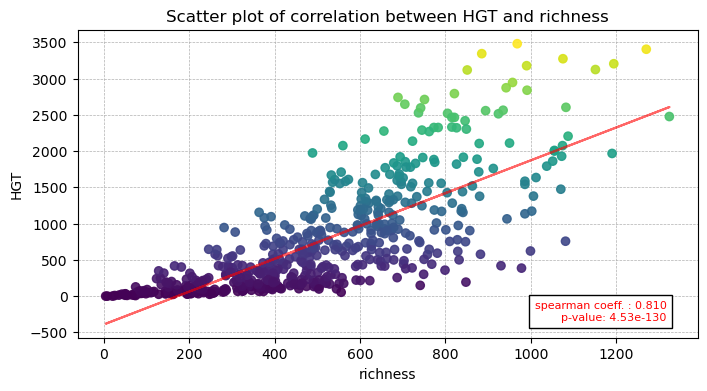

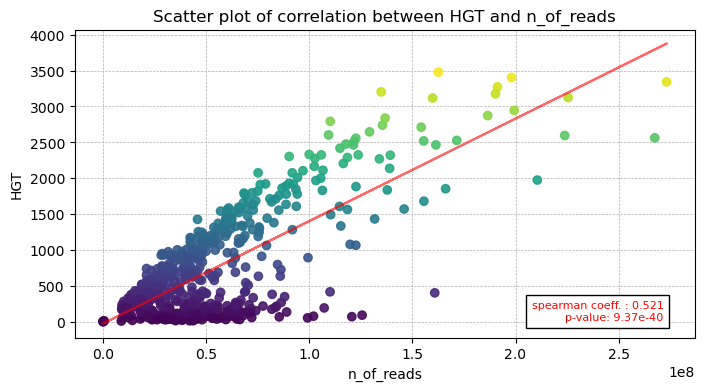

In [58]:
spearman_correlation_scatter(df, "HGT", "richness","small")
spearman_correlation_scatter(df, "HGT", "n_of_reads","small")

# HGT distribution among samples normalized by richness and by depth

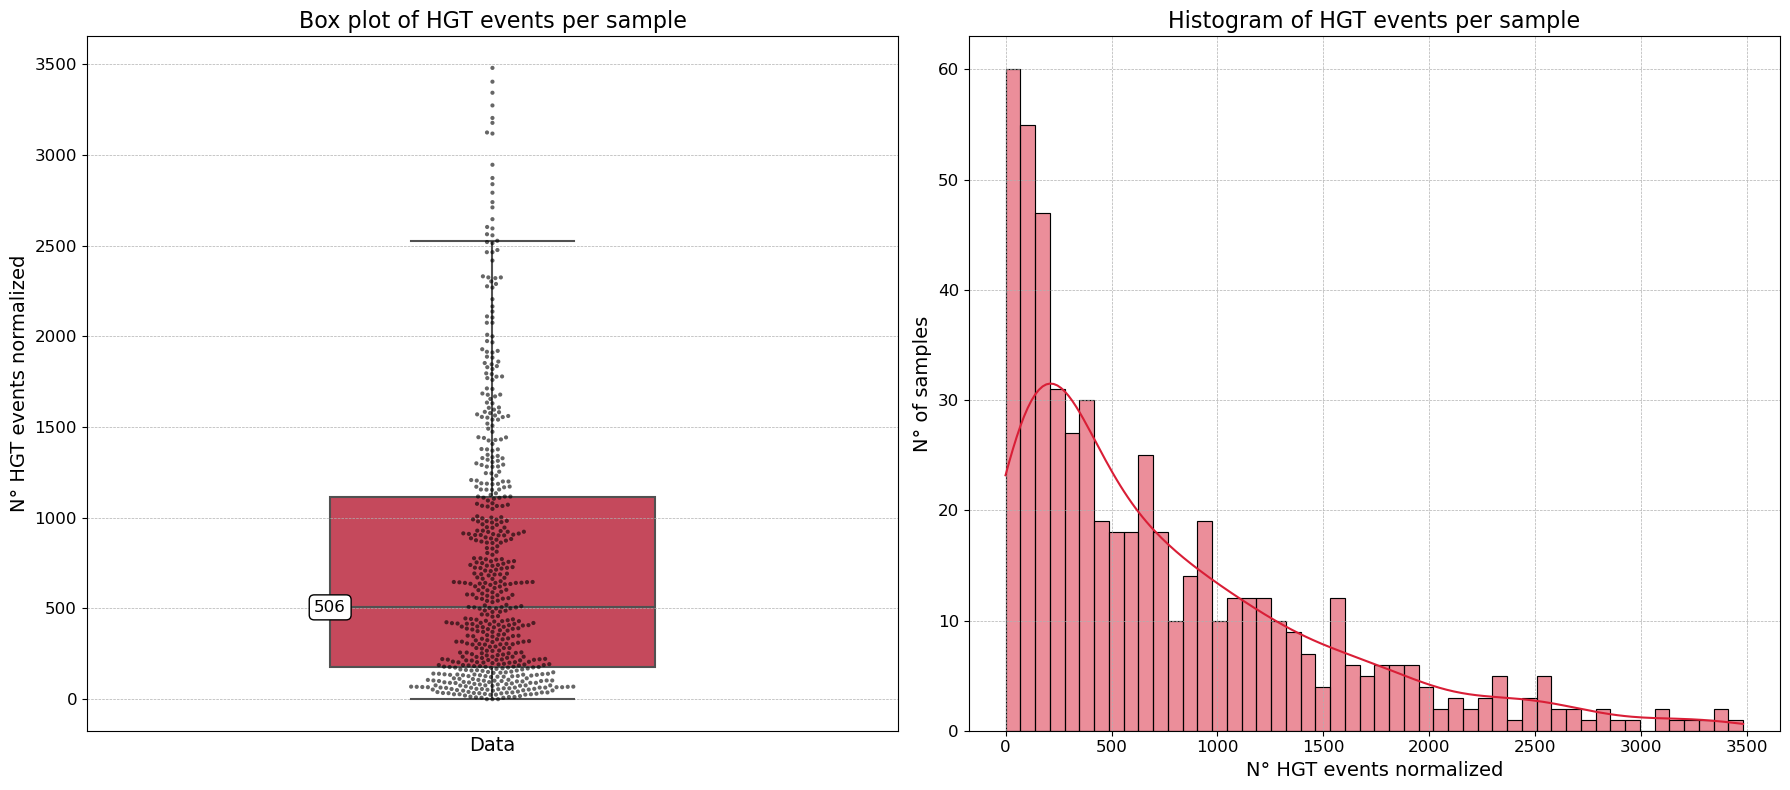

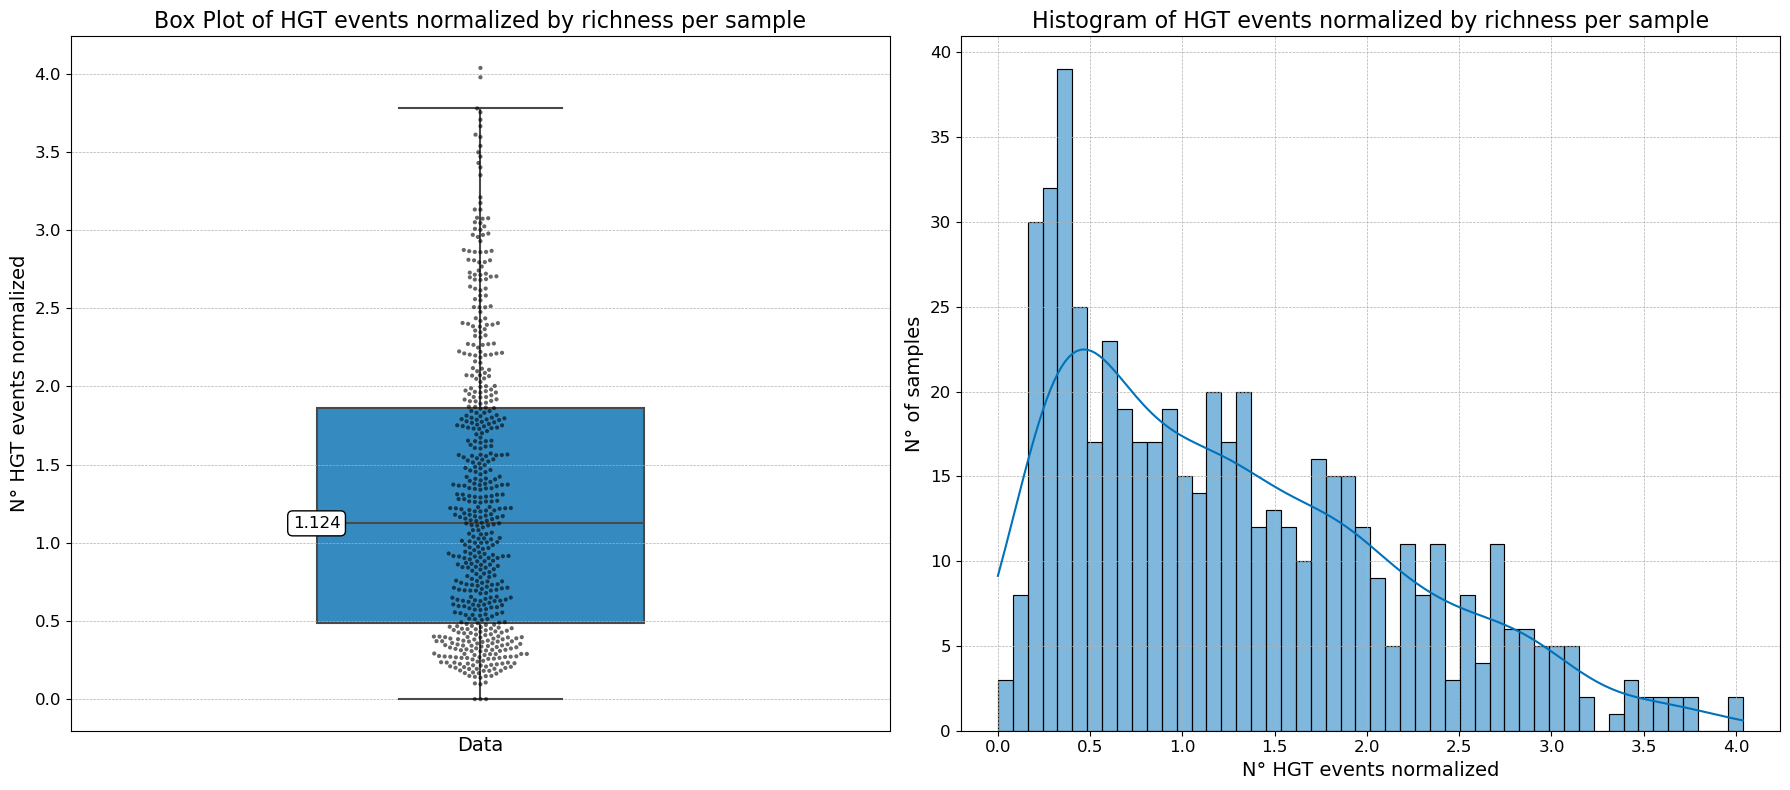

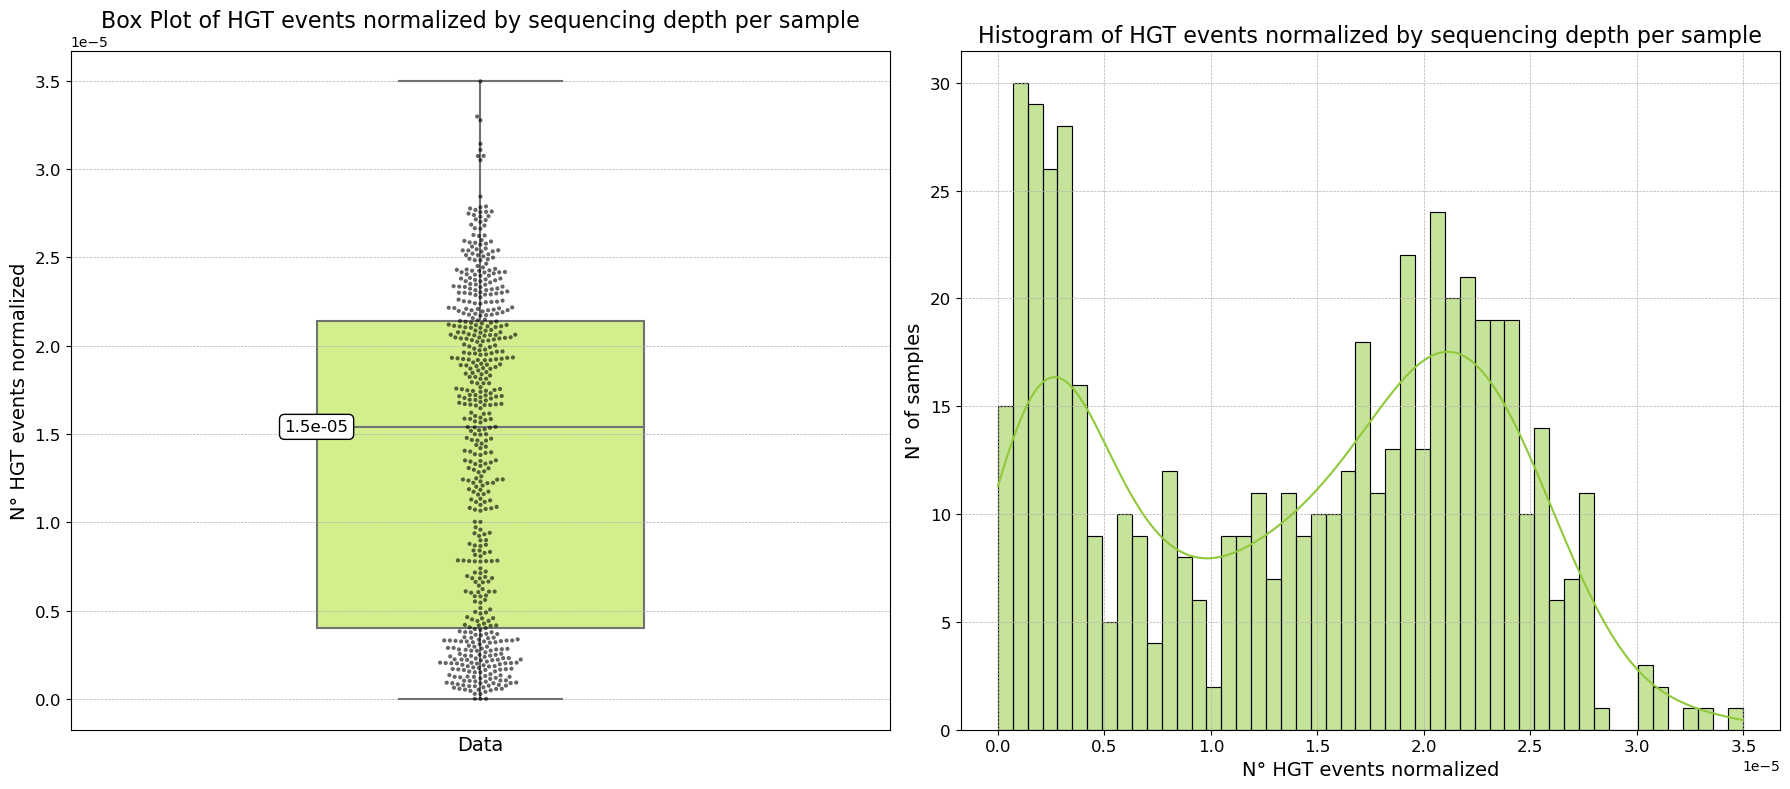

In [21]:
plot_box_swarm_and_histogram(df, 'HGT', 'Box plot of HGT events per sample', 'Histogram of HGT events per sample',dataset_colors[0], dataset_colors[1], 'N° HGT events not normalized', 'N° HGT events not normalized','N° of samples')
plot_box_swarm_and_histogram(df, 'HGT_richness', 'Box Plot of HGT events normalized by richness per sample', 'Histogram of HGT events normalized by richness per sample',dataset_colors[2], dataset_colors[3], 'N° HGT events normalized', 'N° HGT events normalized','N° of samples')
plot_box_swarm_and_histogram(df, 'HGT_depth', 'Box Plot of HGT events normalized by sequencing depth per sample', 'Histogram of HGT events normalized by sequencing depth per sample',dataset_colors[4], dataset_colors[5], 'N° HGT events normalized', 'N° HGT events normalized','N° of samples')

# Distribution of HGT events per sex divided by country

### Statistical signifcance

In [22]:
MW_GH_sex = mannwhitney(df_GH_males['HGT'], df_GH_females['HGT'])
MW_TZ_sex = mannwhitney(df_TZ_males['HGT'], df_TZ_females['HGT'])
MW_sex = mannwhitney(df_males['HGT'], df_females['HGT'])
print("Significance in richness between males and females")
print( "mannwhitney males vs females Ghana:", MW_GH_sex[1])
print( "mannwhitney males vs females Tanzania:",MW_TZ_sex[1])
print( "mannwhitney males vs females:", MW_sex[1])

MW_GH_sex_richness = mannwhitney(df_GH_males['HGT_richness'], df_GH_females['HGT_richness'])
MW_TZ_sex_richness = mannwhitney(df_TZ_males['HGT_richness'], df_TZ_females['HGT_richness'])
MW_sex_richness = mannwhitney(df_males['HGT_richness'], df_females['HGT_richness'])
print("Significance in richness between males and females")
print( "mannwhitney males vs females Ghana:", MW_GH_sex_richness[1])
print( "mannwhitney males vs females Tanzania:",MW_TZ_sex_richness[1])
print( "mannwhitney males vs females:", MW_sex_richness[1])

MW_GH_sex_depth = mannwhitney(df_GH_males['HGT_depth'], df_GH_females['HGT_depth'])
MW_TZ_sex_depth = mannwhitney(df_TZ_males['HGT_depth'], df_TZ_females['HGT_depth'])
MW_sex_depth = mannwhitney(df_males['HGT_depth'], df_females['HGT_depth'])
print("Significance in sequencing depth between males and females")
print( "mannwhitney males vs females Ghana:", MW_GH_sex_depth[1])
print( "mannwhitney males vs females Tanzania:",MW_TZ_sex_depth[1])
print( "mannwhitney males vs females:", MW_sex_depth[1])

Significance in richness between males and females
mannwhitney males vs females Ghana: 0.0011259209475267728
mannwhitney males vs females Tanzania: 0.026269219119188572
mannwhitney males vs females: 0.0003436660481189534
Significance in richness between males and females
mannwhitney males vs females Ghana: 0.0038349518754968357
mannwhitney males vs females Tanzania: 0.00717595346818559
mannwhitney males vs females: 0.0002546369725088666
Significance in sequencing depth between males and females
mannwhitney males vs females Ghana: 0.0018195501959980681
mannwhitney males vs females Tanzania: 0.024202287863676546
mannwhitney males vs females: 0.0004636787631580153


### Plot

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

males_GH v.s. females_GH: Mann-Whitney-Wilcoxon test two-sided, P_val=1.126e-03 U_stat=2.450e+02
males_TZ v.s. females_TZ: Mann-Whitney-Wilcoxon test two-sided, P_val=2.627e-02 U_stat=1.494e+03
males v.s. females: Mann-Whitney-Wilcoxon test two-sided, P_val=3.437e-04 U_stat=3.150e+03


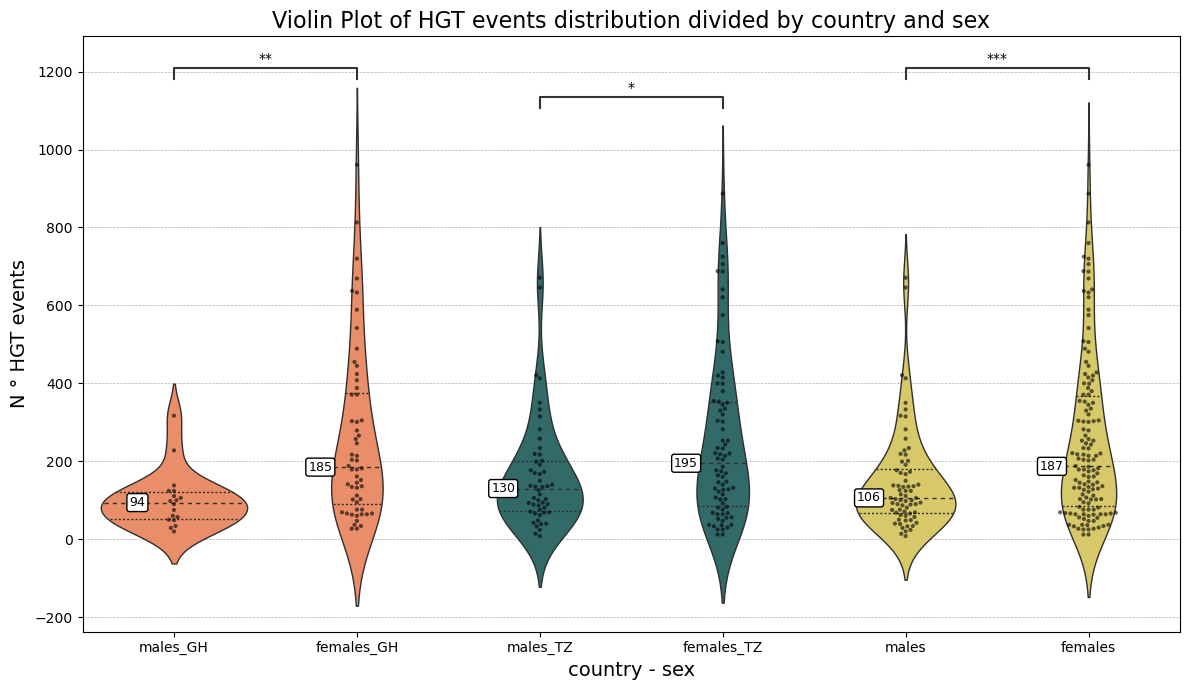

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

males_GH v.s. females_GH: Mann-Whitney-Wilcoxon test two-sided, P_val=3.835e-03 U_stat=2.740e+02
males_TZ v.s. females_TZ: Mann-Whitney-Wilcoxon test two-sided, P_val=7.176e-03 U_stat=1.399e+03
males v.s. females: Mann-Whitney-Wilcoxon test two-sided, P_val=2.546e-04 U_stat=3.120e+03


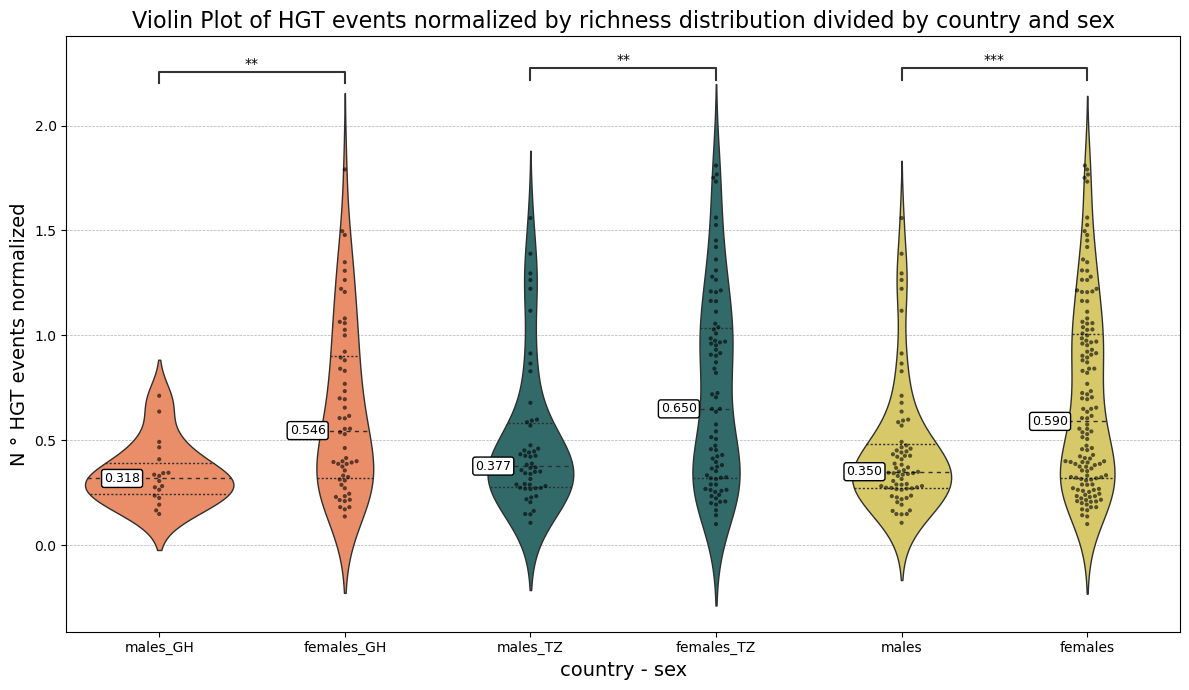

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

males_GH v.s. females_GH: Mann-Whitney-Wilcoxon test two-sided, P_val=1.820e-03 U_stat=2.560e+02
males_TZ v.s. females_TZ: Mann-Whitney-Wilcoxon test two-sided, P_val=2.420e-02 U_stat=1.488e+03
males v.s. females: Mann-Whitney-Wilcoxon test two-sided, P_val=4.637e-04 U_stat=3.181e+03


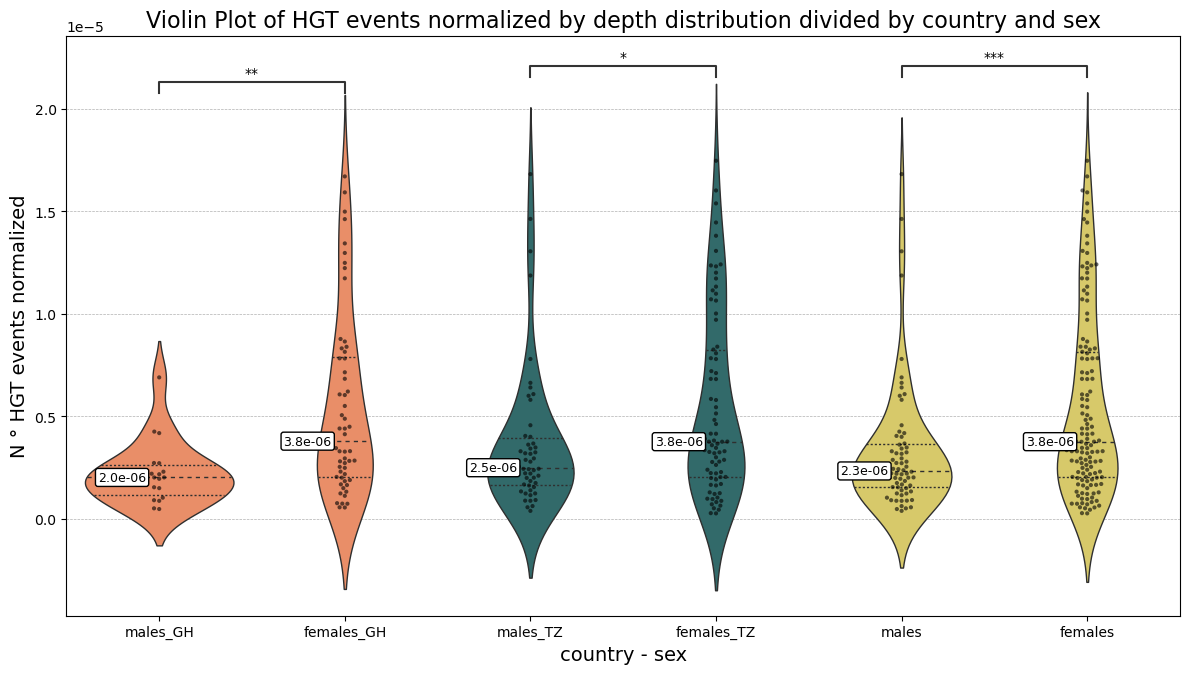

In [23]:
plot_violin_swarm_with_annotations(df_sex_plot, x='dataset', y='HGT', title='Violin Plot of HGT events distribution divided by country and sex', x_label='country - sex', y_label='N ° HGT events', custom_order=['males_GH', 'females_GH', 'males_TZ', 'females_TZ', 'males', 'females'], palette=sex_nation_colors,pairs=[("males_GH", "females_GH"), ("males_TZ", "females_TZ"), ("males", "females")])
plot_violin_swarm_with_annotations(df_sex_plot, x='dataset', y='HGT_richness', title='Violin Plot of HGT events normalized by richness distribution divided by country and sex', x_label='country - sex', y_label='N ° HGT events normalized', custom_order=['males_GH', 'females_GH', 'males_TZ', 'females_TZ', 'males', 'females'], palette=sex_nation_colors,pairs=[("males_GH", "females_GH"), ("males_TZ", "females_TZ"), ("males", "females")])
plot_violin_swarm_with_annotations(df_sex_plot, x='dataset', y='HGT_depth', title='Violin Plot of HGT events normalized by depth distribution divided by country and sex', x_label='country - sex', y_label='N ° HGT events normalized', custom_order=['males_GH', 'females_GH', 'males_TZ', 'females_TZ', 'males', 'females'], palette=sex_nation_colors,pairs=[("males_GH", "females_GH"), ("males_TZ", "females_TZ"), ("males", "females")])

# Distribution of HGT events per species

### Statistical signifcance

In [24]:
groups = [df_humans,df_dogs,df_cows,df_goats,df_sheeps]
names_list=["humans","dogs","cows","goats","sheeps"]

dunn_species=perform_kruskal_dunn(groups,"HGT",names_list)
dunn_species_richness=perform_kruskal_dunn(groups,"HGT_richness",names_list)
dunn_species_depth=perform_kruskal_dunn(groups,"HGT_depth",names_list)


Kruskal-Wallis test result: H-statistic = 247.58385032597133, p-value = 2.1579256743458895e-52
Kruskal-Wallis test is significant, performing Dunn test...
Significant Dunn test results (Bonferroni corrected):
              1         2             3             4             5
1           NaN       NaN  2.510640e-33  1.445059e-39  8.409374e-14
2           NaN       NaN  1.642936e-03  1.520847e-03  2.723348e-03
3  2.510640e-33  0.001643           NaN           NaN           NaN
4  1.445059e-39  0.001521           NaN           NaN           NaN
5  8.409374e-14  0.002723           NaN           NaN           NaN
humans cows 2.510639874297241e-33
humans goats 1.4450586997798664e-39
humans sheeps 8.409373521213231e-14
dogs cows 0.0016429359430032895
dogs goats 0.0015208465788493102
dogs sheeps 0.0027233479367210346
Kruskal-Wallis test result: H-statistic = 210.293987155889, p-value = 2.296934434084593e-44
Kruskal-Wallis test is significant, performing Dunn test...
Significant Dunn test resu

### Plot

/home/giacomo/anaconda3/envs/analysis/lib/python3.12/site-packages/seaborn/categorical.py:1296: UserWarning: 7.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


[('cow', 'human'), ('goat', 'human'), ('sheep', 'human'), ('cow', 'dog'), ('goat', 'dog'), ('sheep', 'dog')]
[2.510639874297241e-33, 1.4450586997798664e-39, 8.409373521213231e-14, 0.0016429359430032895, 0.0015208465788493102, 0.0027233479367210346]
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

dog v.s. cow: Custom statistical test, P_val:1.643e-03
human v.s. cow: Custom statistical test, P_val:2.511e-33
dog v.s. goat: Custom statistical test, P_val:1.521e-03
human v.s. goat: Custom statistical test, P_val:1.445e-39
dog v.s. sheep: Custom statistical test, P_val:2.723e-03
human v.s. sheep: Custom statistical test, P_val:8.409e-14


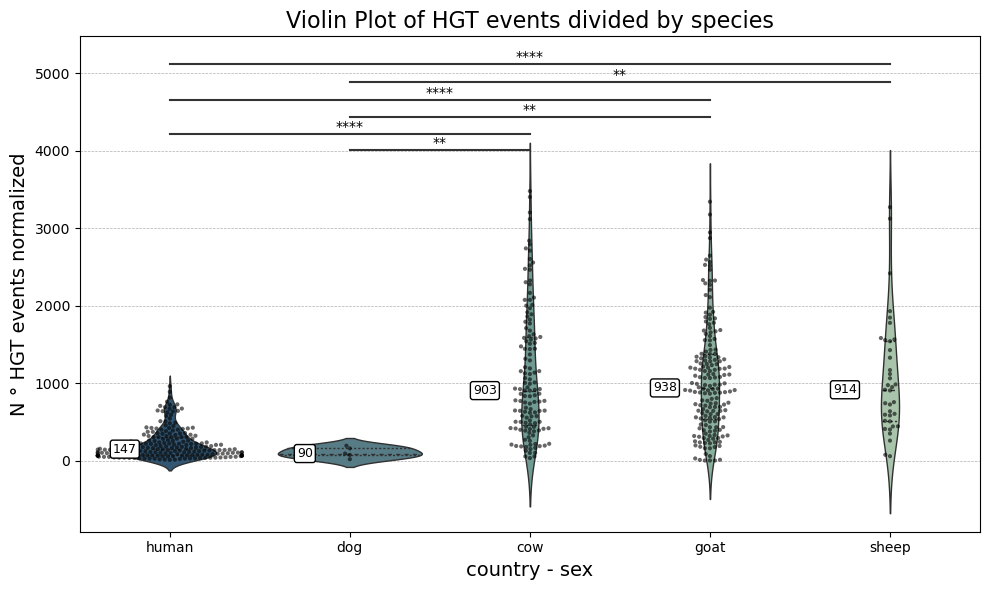

[('cow', 'human'), ('goat', 'human'), ('sheep', 'human'), ('goat', 'cow')]
[3.756076691908061e-20, 1.1482379212279093e-40, 3.087684612915171e-12, 0.040023096998899416]
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

cow v.s. goat: Custom statistical test, P_val:4.002e-02
human v.s. cow: Custom statistical test, P_val:3.756e-20
human v.s. goat: Custom statistical test, P_val:1.148e-40
human v.s. sheep: Custom statistical test, P_val:3.088e-12


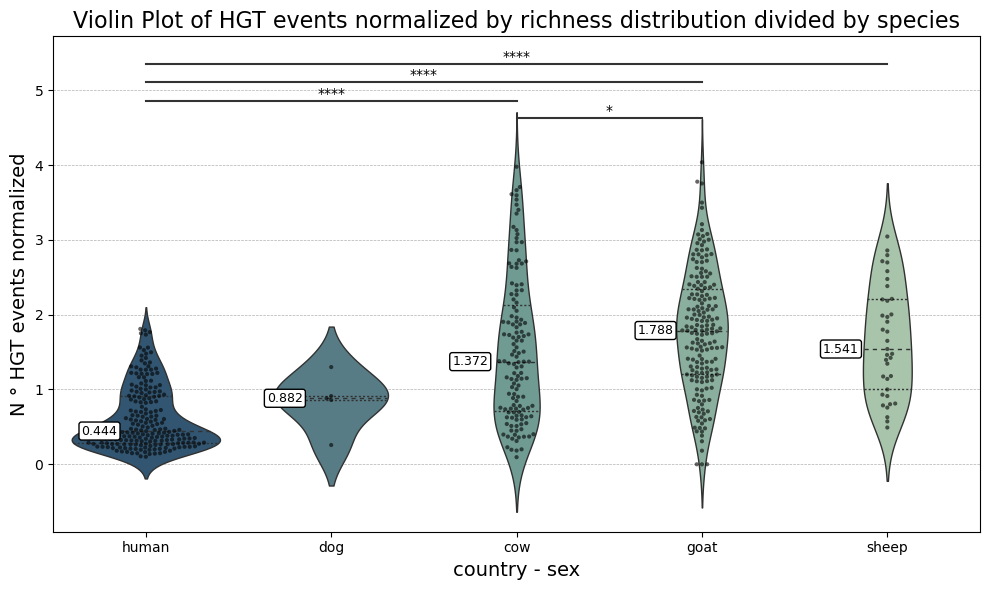

[('cow', 'human'), ('goat', 'human'), ('sheep', 'human'), ('cow', 'dog'), ('goat', 'dog'), ('sheep', 'dog')]
[3.1433239912226843e-46, 3.90430196948747e-48, 8.49549440693485e-19, 0.00038046458604179805, 0.0009282344810710753, 0.000753986982958545]
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

dog v.s. cow: Custom statistical test, P_val:3.805e-04
human v.s. cow: Custom statistical test, P_val:3.143e-46
dog v.s. goat: Custom statistical test, P_val:9.282e-04
human v.s. goat: Custom statistical test, P_val:3.904e-48
dog v.s. sheep: Custom statistical test, P_val:7.540e-04
human v.s. sheep: Custom statistical test, P_val:8.495e-19


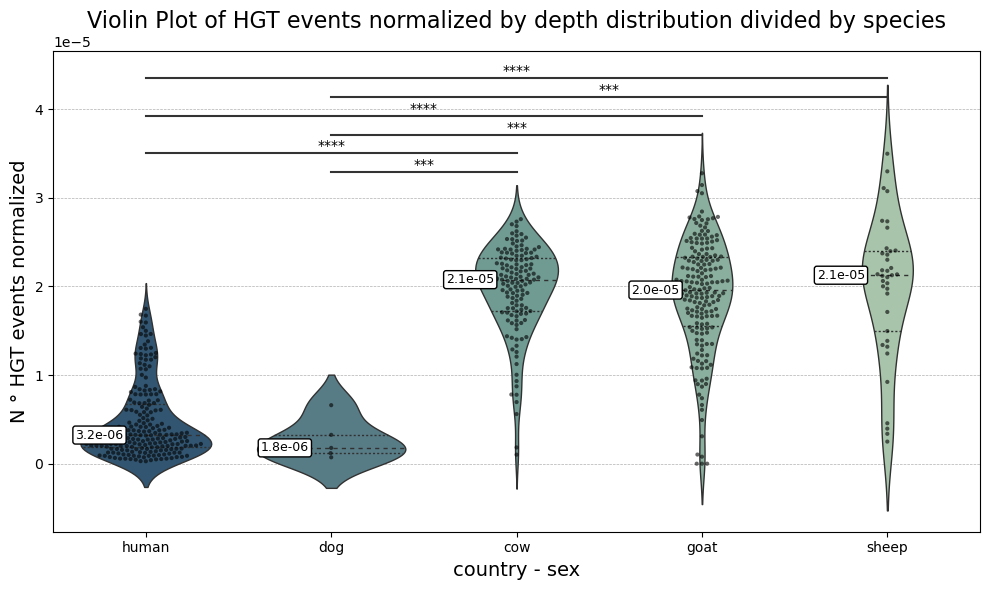

In [25]:
plot_violin_swarm_with_annotations_animals(df_all_species, x='species', y='HGT', significant_results=dunn_species, title='Violin Plot of HGT events divided by species', x_label='country - sex', y_label='N ° HGT events normalized', custom_order = ["human", "dog",  "cow","goat", "sheep"], palette=species_colors,names=["human","dog","cow","goat","sheep"])
plot_violin_swarm_with_annotations_animals(df_all_species, x='species', y='HGT_richness', significant_results=dunn_species_richness, title='Violin Plot of HGT events normalized by richness distribution divided by species', x_label='country - sex', y_label='N ° HGT events normalized', custom_order = ["human", "dog",  "cow","goat", "sheep"], palette=species_colors,names=["human","dog","cow","goat","sheep"])
plot_violin_swarm_with_annotations_animals(df_all_species, x='species', y='HGT_depth', significant_results=dunn_species_depth, title='Violin Plot of HGT events normalized by depth distribution divided by species', x_label='country - sex', y_label='N ° HGT events normalized', custom_order = ["human", "dog",  "cow","goat", "sheep"], palette=species_colors,names=["human","dog","cow","goat","sheep"])

# Distribution of HGT events humans vs animals

### Statistical signifcance

In [26]:
MW_HvsA=mannwhitney(df_animals['HGT'], df_humans['HGT'])
MW_HvsA_richness=mannwhitney(df_animals['HGT_richness'], df_humans['HGT_richness'])
MW_HvsA_depth=mannwhitney(df_animals['HGT_depth'], df_humans['HGT_depth'])

print(MW_HvsA)
print(MW_HvsA_richness)
print(MW_HvsA_depth)

MannwhitneyuResult(statistic=63068.0, pvalue=1.3228494641321356e-52)
MannwhitneyuResult(statistic=60913.5, pvalue=5.5342456068190823e-45)
MannwhitneyuResult(statistic=67009.0, pvalue=3.924148063297201e-68)


### Plot

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

human v.s. animal: Mann-Whitney-Wilcoxon test two-sided, P_val=1.323e-52 U_stat=7.834e+03


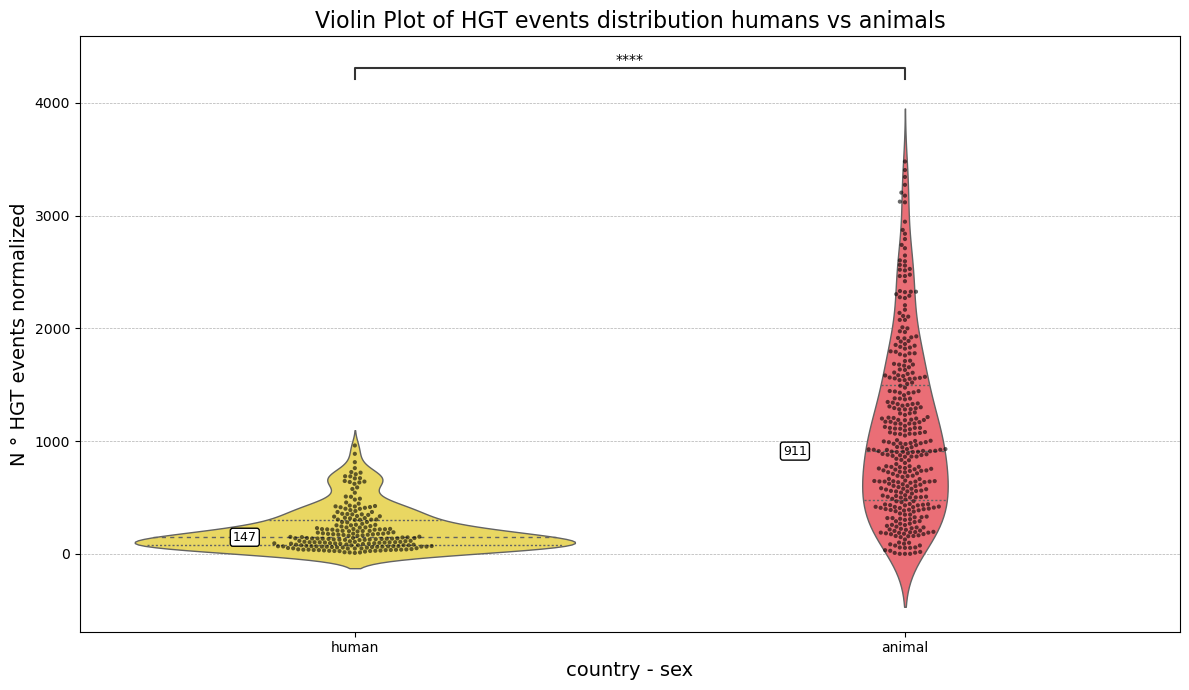

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

human v.s. animal: Mann-Whitney-Wilcoxon test two-sided, P_val=5.534e-45 U_stat=9.988e+03


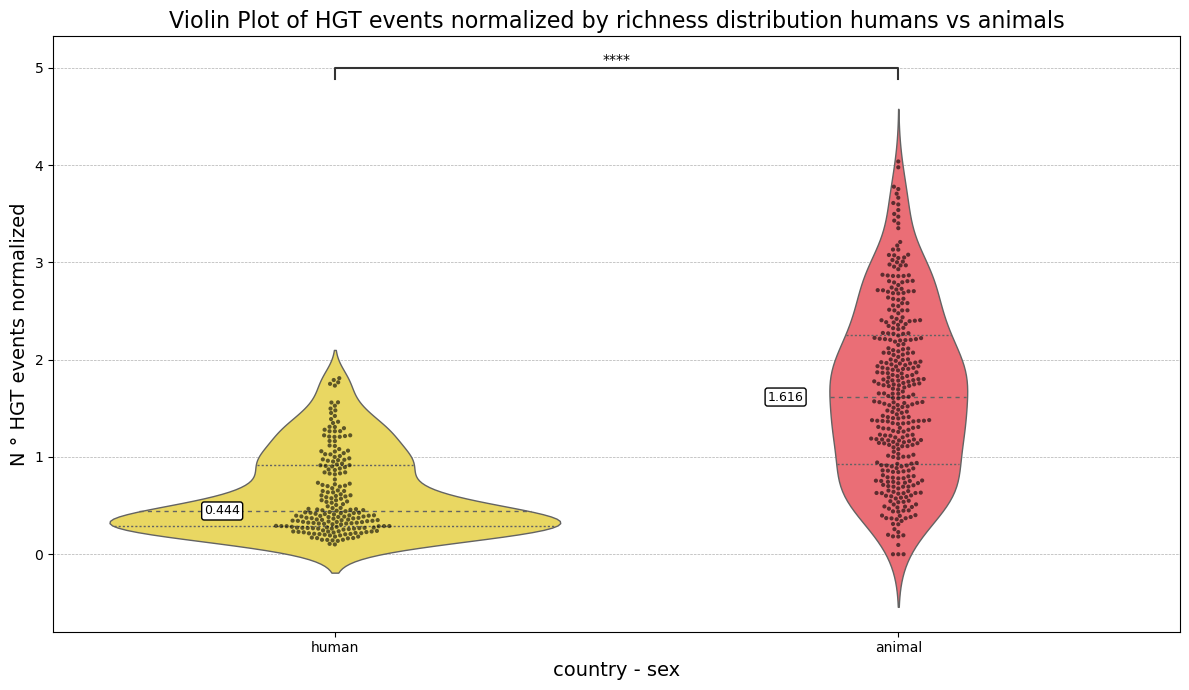

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

human v.s. animal: Mann-Whitney-Wilcoxon test two-sided, P_val=3.924e-68 U_stat=3.893e+03


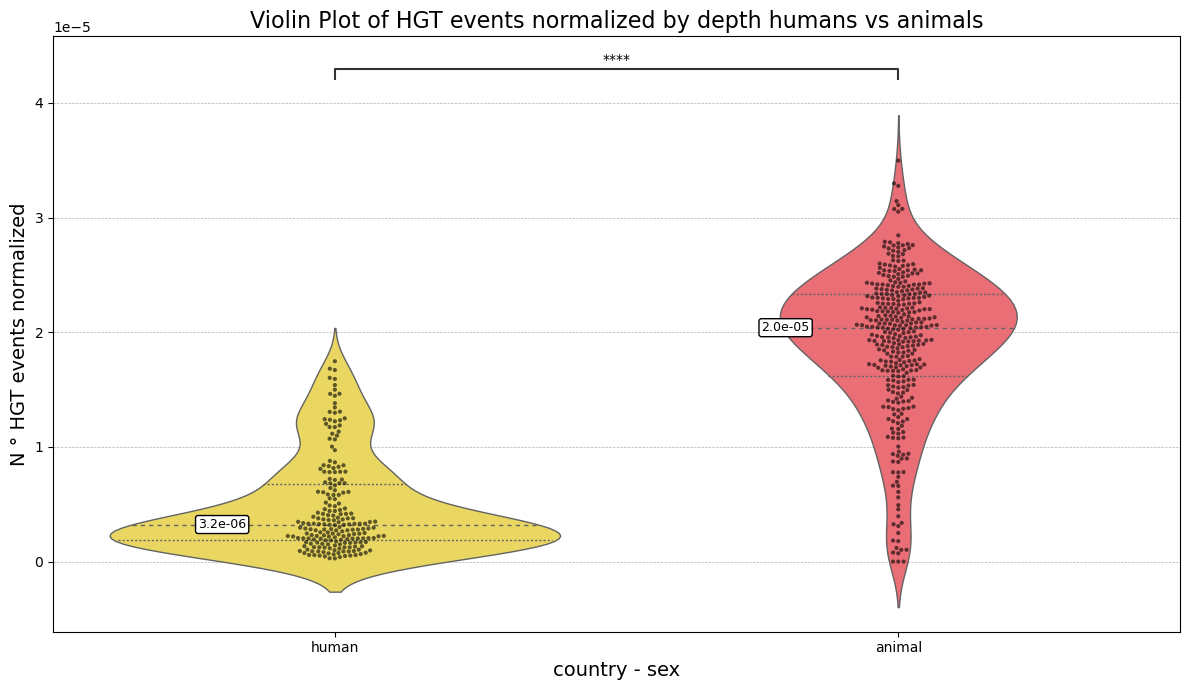

In [27]:
plot_violin_swarm_with_annotations(df_binomial_species, x='species', y='HGT', title='Violin Plot of HGT events distribution humans vs animals', x_label='country - sex', y_label='N ° HGT events normalized', custom_order=["human","animal"],  palette=humans_animals_colors, pairs=[("human", "animal")])
plot_violin_swarm_with_annotations(df_binomial_species, x='species', y='HGT_richness', title='Violin Plot of HGT events normalized by richness distribution humans vs animals', x_label='country - sex', y_label='N ° HGT events normalized', custom_order=["human","animal"],  palette=humans_animals_colors, pairs=[("human", "animal")])
plot_violin_swarm_with_annotations(df_binomial_species, x='species', y='HGT_depth', title='Violin Plot of HGT events normalized by depth humans vs animals', x_label='country - sex', y_label='N ° HGT events normalized', custom_order=["human","animal"],  palette=humans_animals_colors, pairs=[("human", "animal")])


# Distribution of HGT events per family role

### Statistical signifcance

In [28]:
groups = [df_mother,df_father,df_sibling,df_grandmother,df_grandfather, df_aunt, df_uncle, df_cousin]
names_list=["mothers","fathers","siblings","grandmothers","grandfathers","aunts","uncles","cousins"]
dunn_family=perform_kruskal_dunn(groups,"HGT",names_list)
dunn_family_richness=perform_kruskal_dunn(groups,"HGT_richness",names_list)
dunn_family_depth=perform_kruskal_dunn(groups,"HGT_depth",names_list)


Kruskal-Wallis test result: H-statistic = 52.771022062333024, p-value = 4.1137834624006625e-09
Kruskal-Wallis test is significant, performing Dunn test...
Significant Dunn test results (Bonferroni corrected):
          1         2             3             4   5         6   7         8
1       NaN       NaN  3.059398e-03           NaN NaN       NaN NaN       NaN
2       NaN       NaN           NaN  3.881718e-05 NaN  0.036627 NaN       NaN
3  0.003059       NaN           NaN  6.159135e-07 NaN  0.003288 NaN       NaN
4       NaN  0.000039  6.159135e-07           NaN NaN       NaN NaN  0.000575
5       NaN       NaN           NaN           NaN NaN       NaN NaN       NaN
6       NaN  0.036627  3.287808e-03           NaN NaN       NaN NaN  0.017612
7       NaN       NaN           NaN           NaN NaN       NaN NaN       NaN
8       NaN       NaN           NaN  5.754358e-04 NaN  0.017612 NaN       NaN
mothers siblings 0.003059398495211821
fathers grandmothers 3.8817180307315144e-05
fathers

### Plot

[('sibling', 'mother'), ('grandmother', 'father'), ('aunt', 'father'), ('grandmother', 'sibling'), ('aunt', 'sibling'), ('cousin', 'grandmother'), ('cousin', 'aunt')]
[0.003059398495211821, 3.8817180307315144e-05, 0.03662725756781236, 6.159134950666191e-07, 0.003287808118978111, 0.0005754357855710325, 0.01761226057584128]
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

sibling v.s. grandmother: Custom statistical test, P_val:6.159e-07
mother v.s. sibling: Custom statistical test, P_val:3.059e-03
father v.s. grandmother: Custom statistical test, P_val:3.882e-05
aunt v.s. cousin: Custom statistical test, P_val:1.761e-02
sibling v.s. aunt: Custom statistical test, P_val:3.288e-03
father v.s. aunt: Custom statistical test, P_val:3.663e-02
grandmother v.s. cousin: Custom statistical test, P_val:5.754e-04


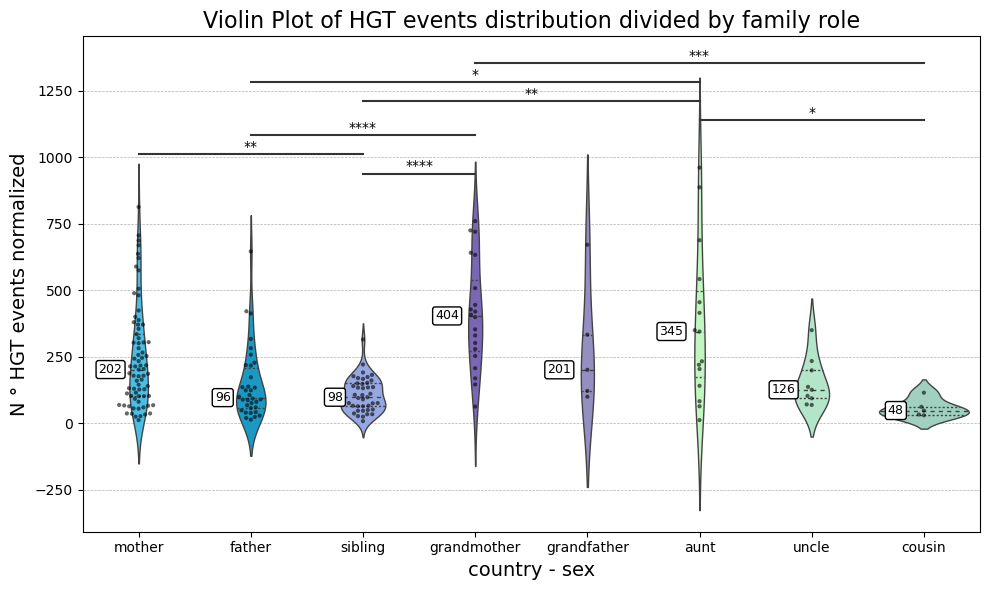

[('sibling', 'mother'), ('cousin', 'mother'), ('grandmother', 'father'), ('aunt', 'father'), ('grandmother', 'sibling'), ('grandfather', 'sibling'), ('aunt', 'sibling'), ('cousin', 'grandmother'), ('cousin', 'grandfather'), ('cousin', 'aunt')]
[3.629986974922565e-05, 0.04875088789851162, 4.490810970311899e-05, 0.006067672141731692, 7.345457221330839e-09, 0.010343731880579495, 1.3679408450297753e-05, 0.00023723023275479632, 0.01500407465308434, 0.0025480683528677633]
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

sibling v.s. grandmother: Custom statistical test, P_val:7.345e-09
mother v.s. sibling: Custom statistical test, P_val:3.630e-05
father v.s. grandmother: Custom statistical test, P_val:4.491e-05
sibling v.s. grandfather: Custom statistical test, P_val:1.034e-02
aunt v.s. cousin: Custom statistical test, P_val:2.548e-03
sibling v.s. aunt: Custom statistical test, 

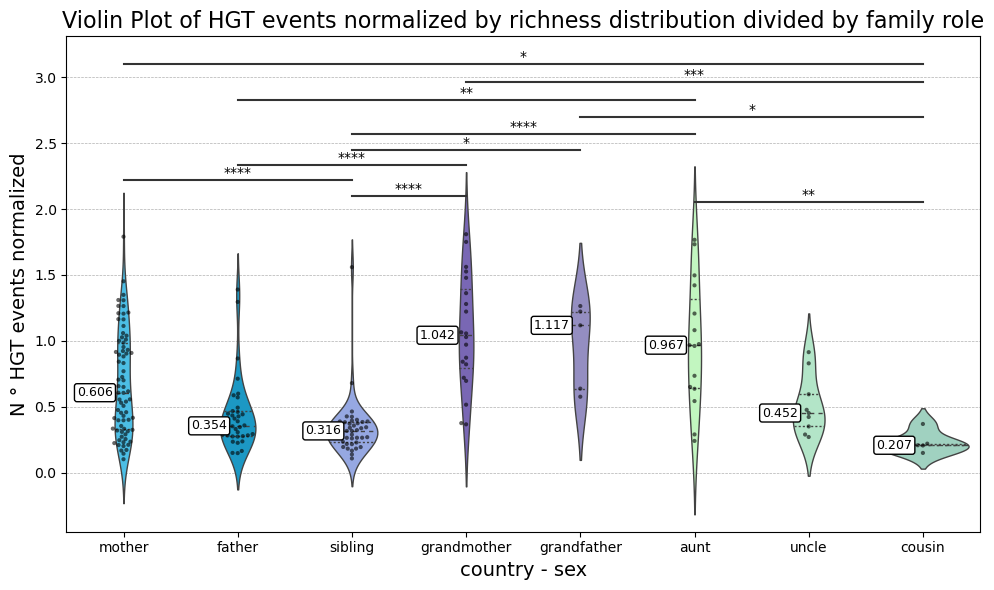

[('sibling', 'mother'), ('grandmother', 'father'), ('grandmother', 'sibling'), ('aunt', 'sibling'), ('cousin', 'grandmother')]
[0.0008133878695376107, 2.740567793761062e-05, 2.1730971942424528e-07, 0.011716037623420997, 0.001664843781758355]
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

sibling v.s. grandmother: Custom statistical test, P_val:2.173e-07
mother v.s. sibling: Custom statistical test, P_val:8.134e-04
father v.s. grandmother: Custom statistical test, P_val:2.741e-05
sibling v.s. aunt: Custom statistical test, P_val:1.172e-02
grandmother v.s. cousin: Custom statistical test, P_val:1.665e-03


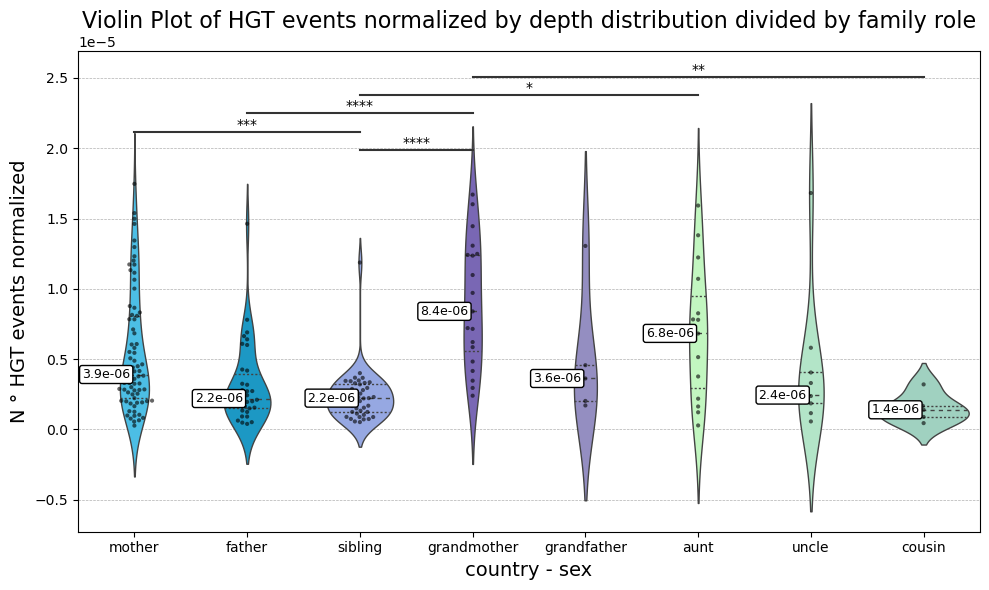

In [29]:
plot_violin_swarm_with_annotations_animals(df_family_role, x='family_role', y='HGT', significant_results=dunn_family, title='Violin Plot of HGT events distribution divided by family role', x_label='country - sex', y_label='N ° HGT events normalized', custom_order = ["mother", "father",  "sibling","grandmother", "grandfather","aunt","uncle","cousin"], palette=family_colors, names = ["mother", "father",  "sibling","grandmother", "grandfather","aunt","uncle","cousin"])
plot_violin_swarm_with_annotations_animals(df_family_role, x='family_role', y='HGT_richness', significant_results=dunn_family_richness, title='Violin Plot of HGT events normalized by richness distribution divided by family role', x_label='country - sex', y_label='N ° HGT events normalized', custom_order = ["mother", "father",  "sibling","grandmother", "grandfather","aunt","uncle","cousin"], palette=family_colors, names = ["mother", "father",  "sibling","grandmother", "grandfather","aunt","uncle","cousin"])
plot_violin_swarm_with_annotations_animals(df_family_role, x='family_role', y='HGT_depth', significant_results=dunn_family_depth, title='Violin Plot of HGT events normalized by depth distribution divided by family role', x_label='country - sex', y_label='N ° HGT events normalized', custom_order = ["mother", "father",  "sibling","grandmother", "grandfather","aunt","uncle","cousin"], palette=family_colors, names = ["mother", "father",  "sibling","grandmother", "grandfather","aunt","uncle","cousin"])

# Distribution of HGT events by age

### Statistical significance

In [30]:
groups = [df_newborn, df_child, df_schoolage, df_adult, df_senior]
names_list=["newborns","children","schoolage","adults","seniors"]
dunn_age=perform_kruskal_dunn(groups,"HGT",names_list)
dunn_age_richness=perform_kruskal_dunn(groups,"HGT_richness",names_list)
dunn_age_depth=perform_kruskal_dunn(groups,"HGT_depth",names_list)

Kruskal-Wallis test result: H-statistic = 32.27636100658374, p-value = 1.6797396433461772e-06
Kruskal-Wallis test is significant, performing Dunn test...
Significant Dunn test results (Bonferroni corrected):
    1         2   3         4         5
1 NaN       NaN NaN       NaN       NaN
2 NaN       NaN NaN  0.000003  0.001352
3 NaN       NaN NaN       NaN       NaN
4 NaN  0.000003 NaN       NaN       NaN
5 NaN  0.001352 NaN       NaN       NaN
children adults 3.075906590385484e-06
children seniors 0.0013522861596562564
Kruskal-Wallis test result: H-statistic = 40.73077399624377, p-value = 3.05587488108239e-08
Kruskal-Wallis test is significant, performing Dunn test...
Significant Dunn test results (Bonferroni corrected):
    1             2   3             4         5
1 NaN           NaN NaN           NaN       NaN
2 NaN           NaN NaN  7.026706e-08  0.000079
3 NaN           NaN NaN           NaN       NaN
4 NaN  7.026706e-08 NaN           NaN       NaN
5 NaN  7.898139e-05 NaN      

### Plot

[('adult', 'child'), ('senior', 'child')]
[3.075906590385484e-06, 0.0013522861596562564]
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

child v.s. adult: Custom statistical test, P_val:3.076e-06
child v.s. senior: Custom statistical test, P_val:1.352e-03


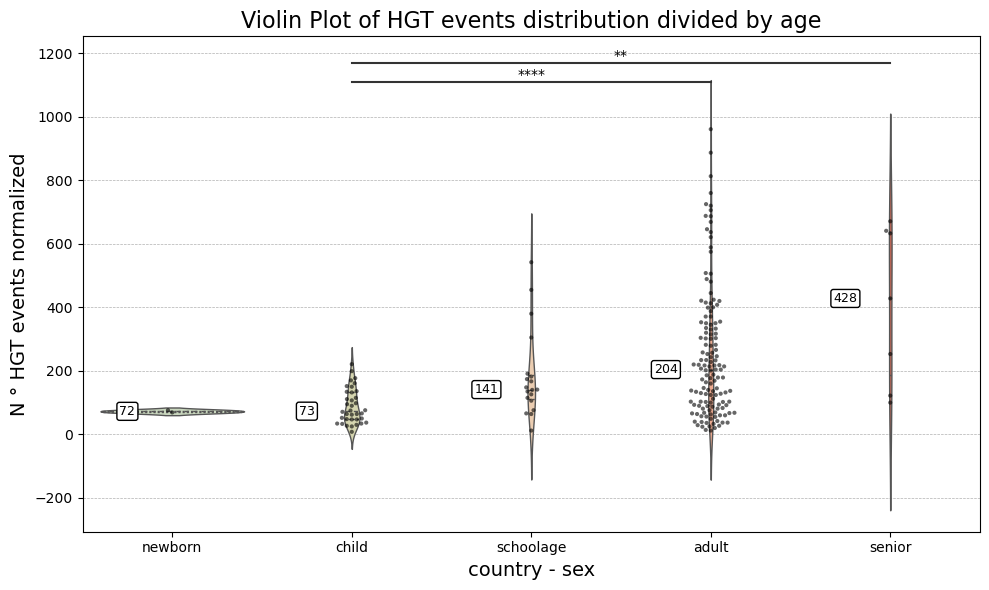

[('adult', 'child'), ('senior', 'child')]
[7.0267064278568e-08, 7.898139027200484e-05]
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

child v.s. adult: Custom statistical test, P_val:7.027e-08
child v.s. senior: Custom statistical test, P_val:7.898e-05


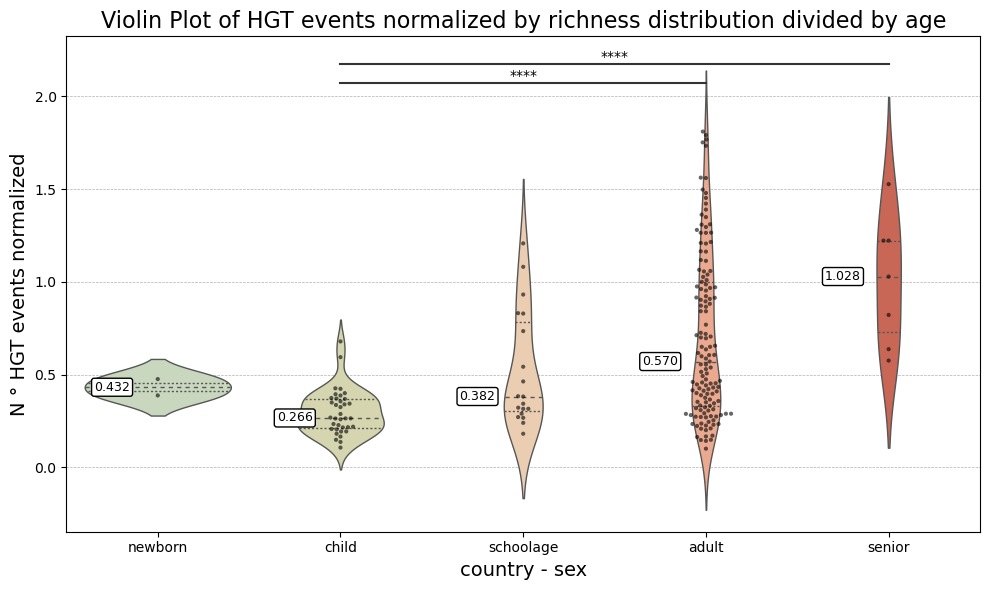

[('adult', 'child'), ('senior', 'child')]
[8.68936002013258e-07, 0.003382205434996485]
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

child v.s. adult: Custom statistical test, P_val:8.689e-07
child v.s. senior: Custom statistical test, P_val:3.382e-03


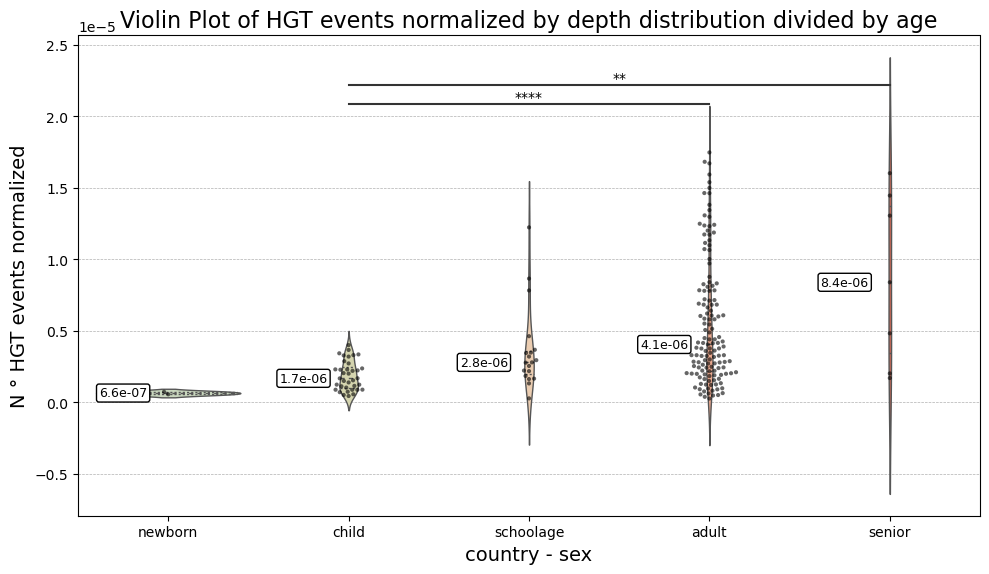

In [31]:
plot_violin_swarm_with_annotations_animals(df_age, x='dataset', y='HGT', significant_results=dunn_age, title='Violin Plot of HGT events distribution divided by age', x_label='country - sex', y_label='N ° HGT events normalized', custom_order = ["newborn","child","schoolage","adult","senior"], palette=age_colors, names = ["newborn","child","schoolage","adult","senior"])
plot_violin_swarm_with_annotations_animals(df_age, x='dataset', y='HGT_richness', significant_results=dunn_age_richness, title='Violin Plot of HGT events normalized by richness distribution divided by age', x_label='country - sex', y_label='N ° HGT events normalized', custom_order = ["newborn","child","schoolage","adult","senior"], palette=age_colors, names = ["newborn","child","schoolage","adult","senior"])
plot_violin_swarm_with_annotations_animals(df_age, x='dataset', y='HGT_depth', significant_results=dunn_age_depth, title='Violin Plot of HGT events normalized by depth distribution divided by age', x_label='country - sex', y_label='N ° HGT events normalized', custom_order = ["newborn","child","schoolage","adult","senior"], palette=age_colors, names = ["newborn","child","schoolage","adult","senior"])

# Dsitribution of HGT events by household

### Ghana

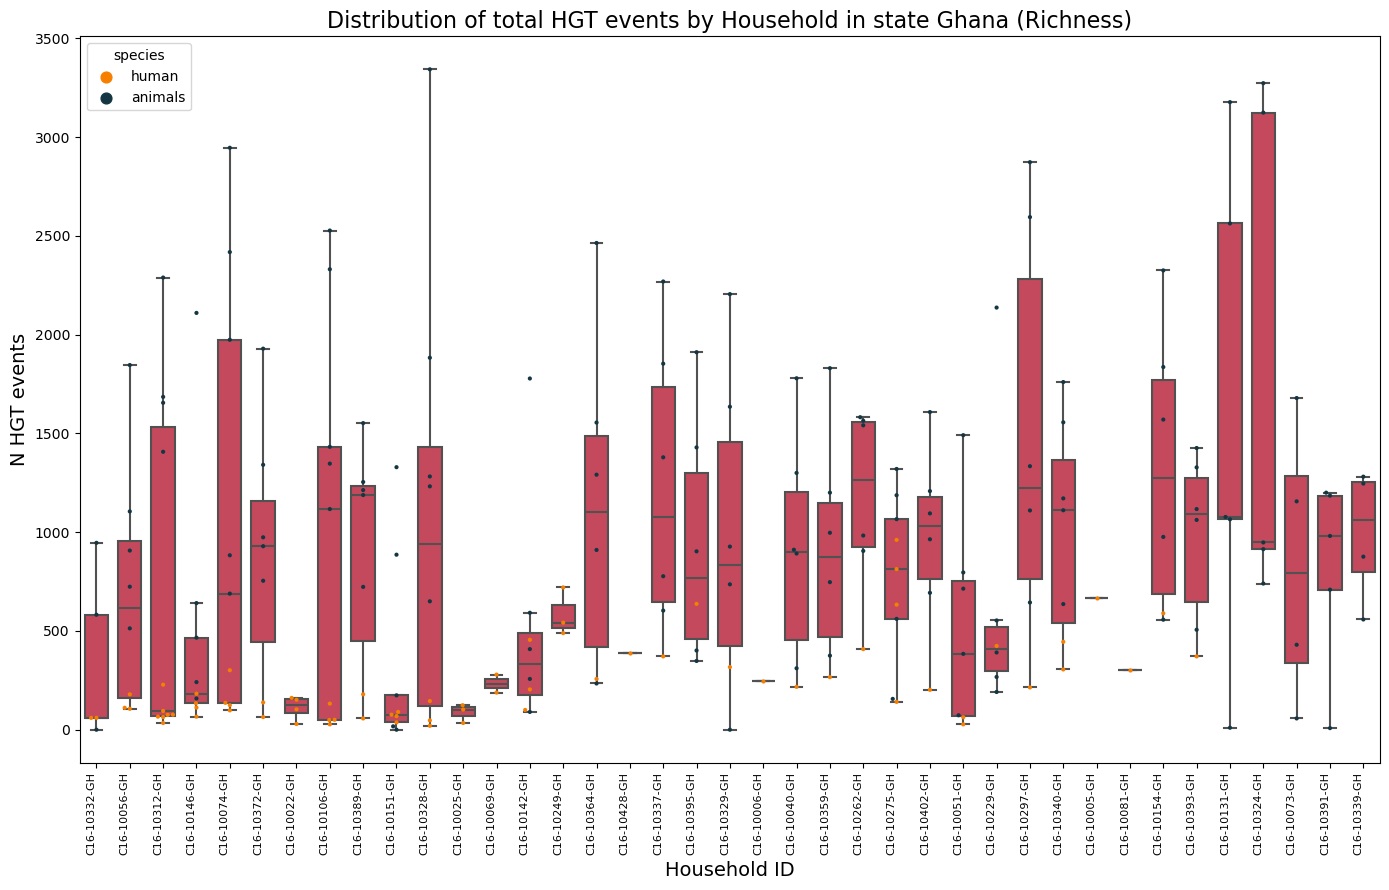

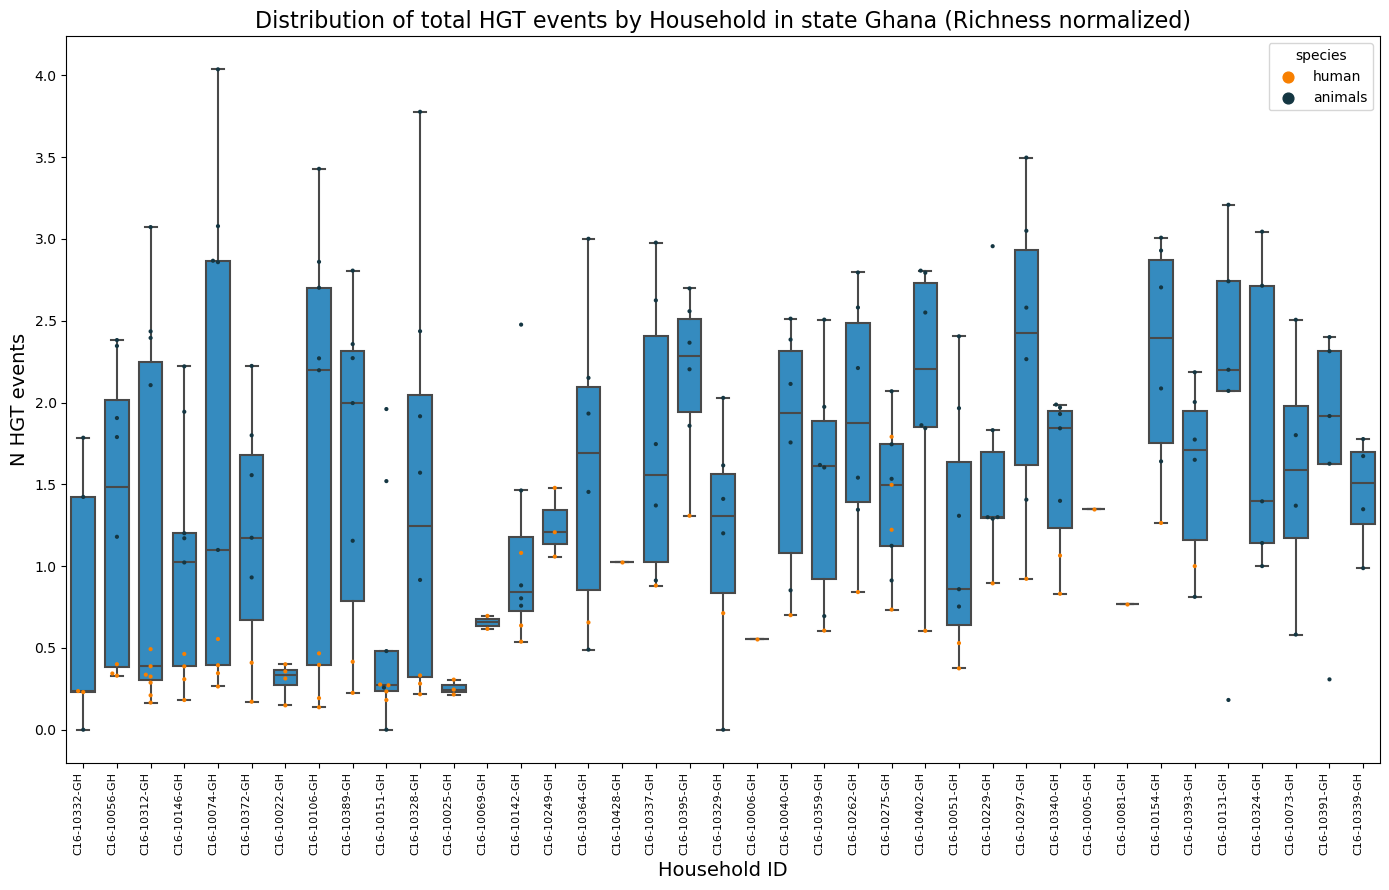

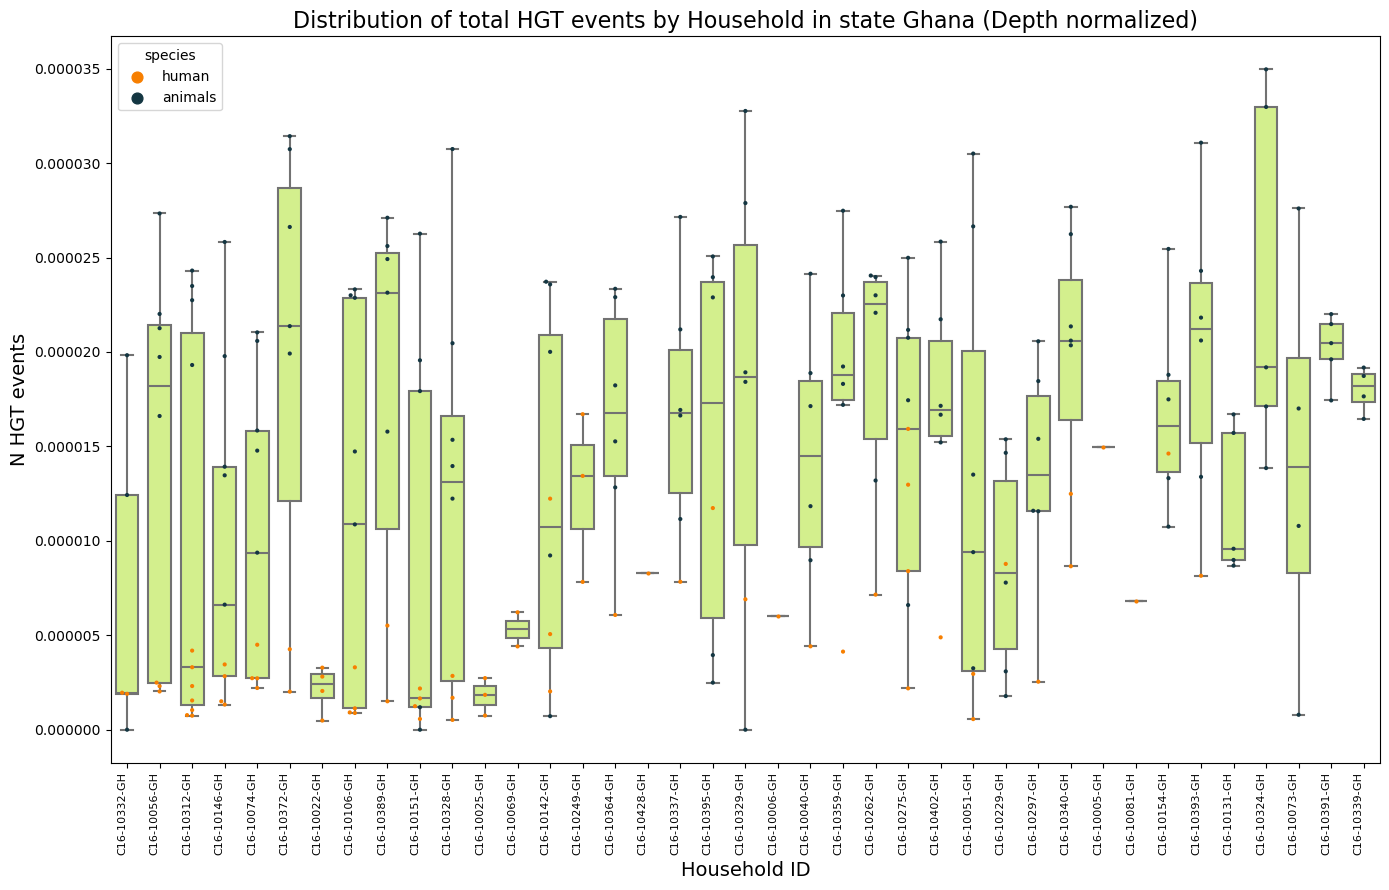

In [32]:
plot_box_swarm(data=df_ghana,x_col='householdID',y_col='HGT',title='Distribution of total HGT events by Household in state Ghana (Richness)',x_label='Household ID',y_label='N HGT events',color=dataset_colors[0])
plot_box_swarm(data=df_ghana,x_col='householdID',y_col='HGT_richness',title='Distribution of total HGT events by Household in state Ghana (Richness normalized)',x_label='Household ID',y_label='N HGT events',color=dataset_colors[2])
plot_box_swarm(data=df_ghana,x_col='householdID',y_col='HGT_depth',title='Distribution of total HGT events by Household in state Ghana (Depth normalized)',x_label='Household ID',y_label='N HGT events',color=dataset_colors[4])

### Tanzania

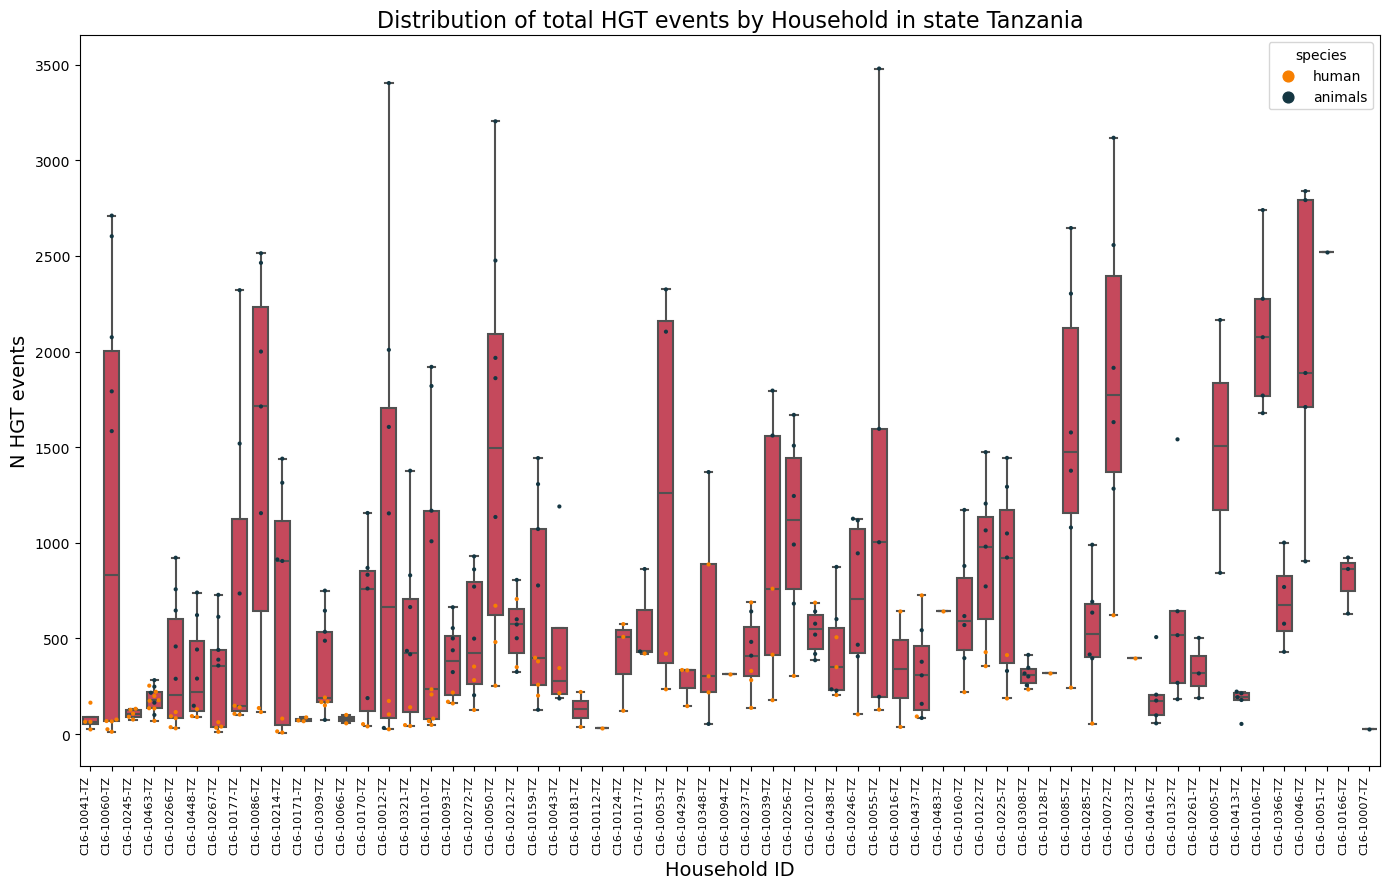

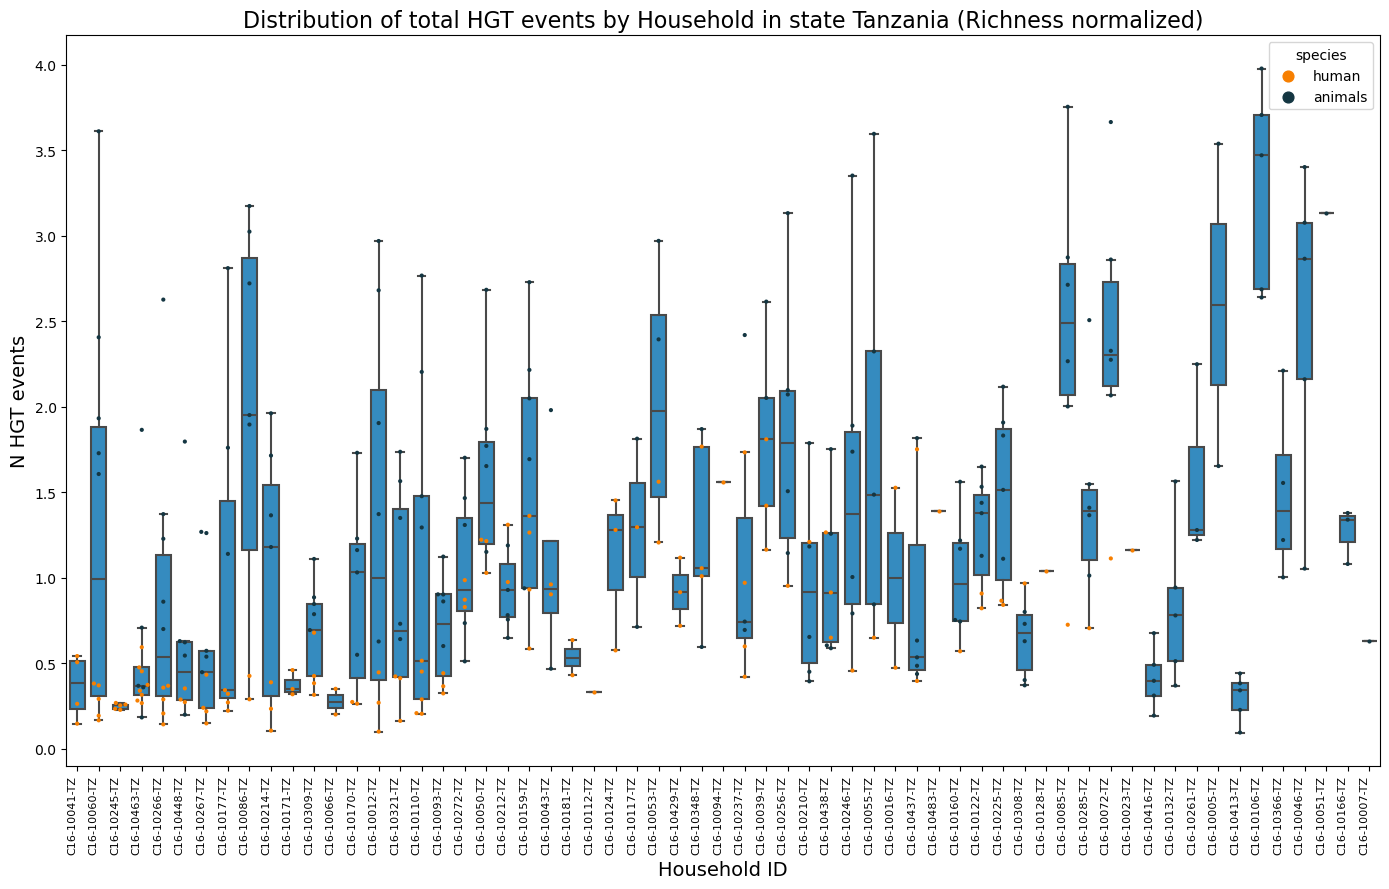

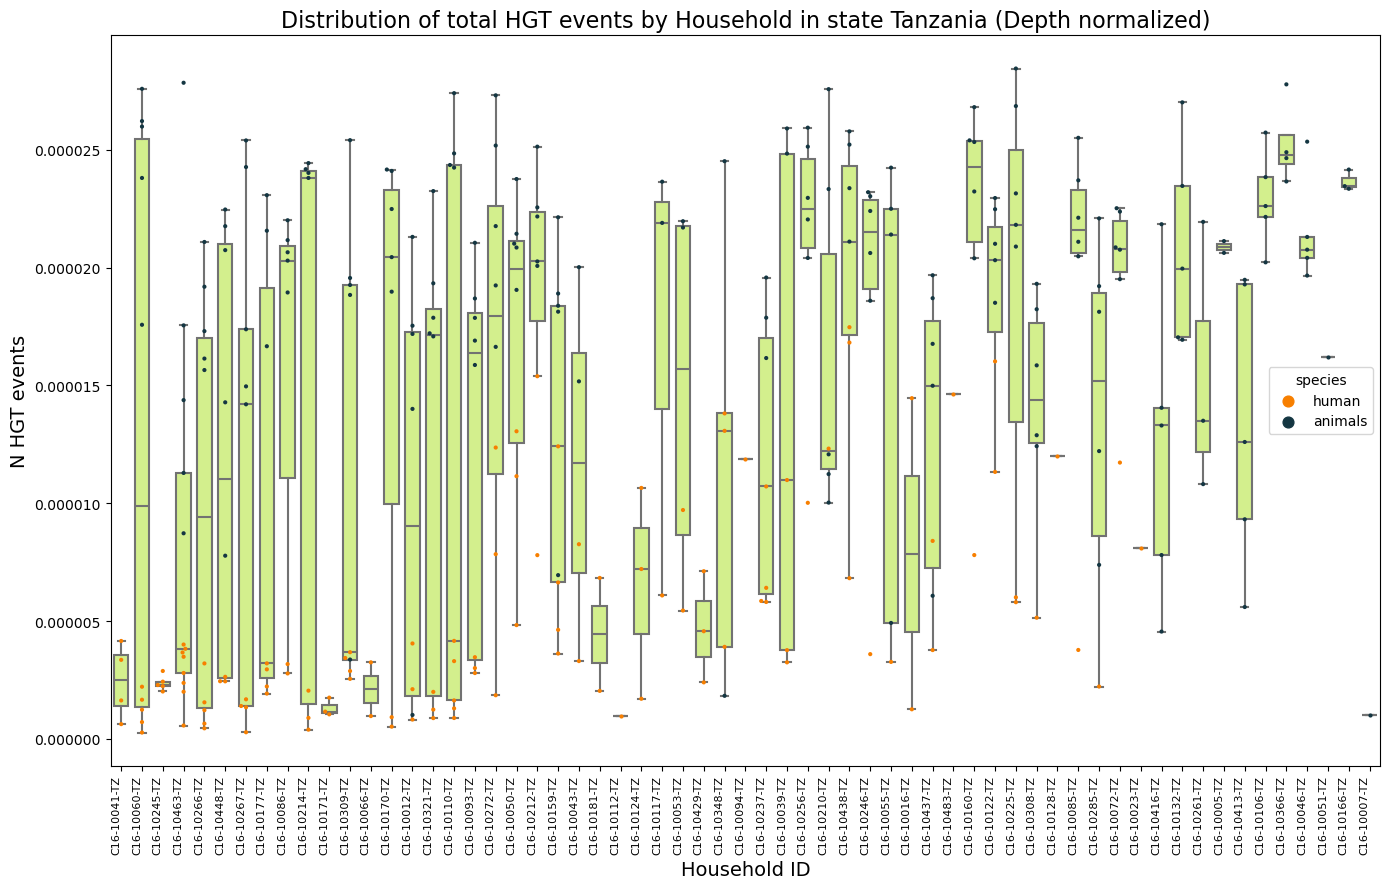

In [33]:
plot_box_swarm(data=df_tanzania,x_col='householdID',y_col='HGT',title='Distribution of total HGT events by Household in state Tanzania',x_label='Household ID',y_label='N HGT events',color=dataset_colors[0])
plot_box_swarm(data=df_tanzania,x_col='householdID',y_col='HGT_richness',title='Distribution of total HGT events by Household in state Tanzania (Richness normalized)',x_label='Household ID',y_label='N HGT events',color=dataset_colors[2])
plot_box_swarm(data=df_tanzania,x_col='householdID',y_col='HGT_depth',title='Distribution of total HGT events by Household in state Tanzania (Depth normalized)',x_label='Household ID',y_label='N HGT events',color=dataset_colors[4])

# LCA analysis

## Extraxt LCAs

In [34]:
df_LCA_raw=pd.DataFrame()
df_top_species_raw=pd.DataFrame()
df_top_genus_raw=pd.DataFrame()
species=[]
genus=[]
lcas=[]
samples=df["sampleID"].to_list()
for sample in samples:
    with open(f"/home/giacomo/Thesis-Internship/waafle/data/{sample}.lgt.tsv", "r") as infile:
        next(infile)
        err=[]
        for line in infile:
            lca=line.split("\t")[9]
            tax1=line.split("\t")[12].split("|")
            tax2=line.split("\t")[13].split("|")
            meld1=line.split("\t")[10].split("|")
            meld2=line.split("\t")[11].split("|")
            if lca=="r__Root":
                if "k__Archaea" not in tax1 and "k__Archaea" not in tax2:
                    lca="undefined"
            lcas.append(lca) 
            
            #Only the first meld option is ocnsidered
            if meld1[0]!="--":
                tax1.extend(meld1)
            if meld2[0]!="--":
                tax2.extend(meld2)
                
            if len(tax1)>6:
                genus.append(tax1[6])
                if len(tax1)>7:
                    species.append(tax1[7])
            if len(tax2)>6:
                genus.append(tax2[6])
                if len(tax2)>7:
                    species.append(tax2[7])                  
df_top_species_raw["tax"]=species
df_top_genus_raw["tax"]=genus
df_LCA_raw["LCA"]=lcas
#df.to_csv(f"/home/giacomo/Thesis-Internship/waafle/{dir}/{file}", sep="\t", index=False)
df_LCA=df_LCA_raw.value_counts().rename_axis('LCA').reset_index(name='count')
df_LCA.head(20)

,LCA,count
0,p__Firmicutes,126295
1,k__Bacteria,56022
2,p__Bacteroidota,32790
3,f__Oscillospiraceae,29638
4,o__Eubacteriales,13226
5,f__FGB50354,9619
6,f__Lachnospiraceae,8429
7,f__FGB56395,4532
8,f__FGB37155,3713
9,f__Prevotellaceae,3559


## Count the clade occurence

In [35]:
# Iterate through the rows and check for the specific code
tax=["Root","Kingdom","Phylum","Class","Order","Family","Genus","Species","undefined"]
k=0
p=0
c=0
o=0
f=0
g=0
s=0
r=0
t=0
l=[]
for index, row in df_LCA.iterrows():
    if "k__" in row['LCA']:
        k+=row["count"]
    elif "p__" in row['LCA']:
        p+=row["count"]
    elif "c__" in row['LCA']:
        c+=row["count"]
    elif "o__" in row['LCA']:
        o+=row["count"]
    elif "f__" in row['LCA']:
        f+=row["count"]
    elif "g__" in row['LCA']:
        g+=row["count"]
    elif "s__" in row['LCA']:
        s+=row["count"]
    elif "r__" in row['LCA']:
        r+=row["count"]
    else:
        t+=row["count"]
l.append(r)
l.append(k)
l.append(p)
l.append(c)
l.append(o)
l.append(f)
l.append(g)
l.append(s)
l.append(t)

df_clades=pd.DataFrame(columns=["level","count"])
df_clades["level"]=tax
df_clades["count"]=l
df_clades

,level,count
0,Root,2939
1,Kingdom,56023
2,Phylum,164543
3,Class,654
4,Order,15787
5,Family,131226
6,Genus,44606
7,Species,792
8,undefined,92


In [36]:
print(df["HGT"].sum())
print(df_clades["count"].sum())

416662
416662


## Clades distribution

/tmp/ipykernel_508/1177064877.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(df[level_col], rotation=45, ha='right')


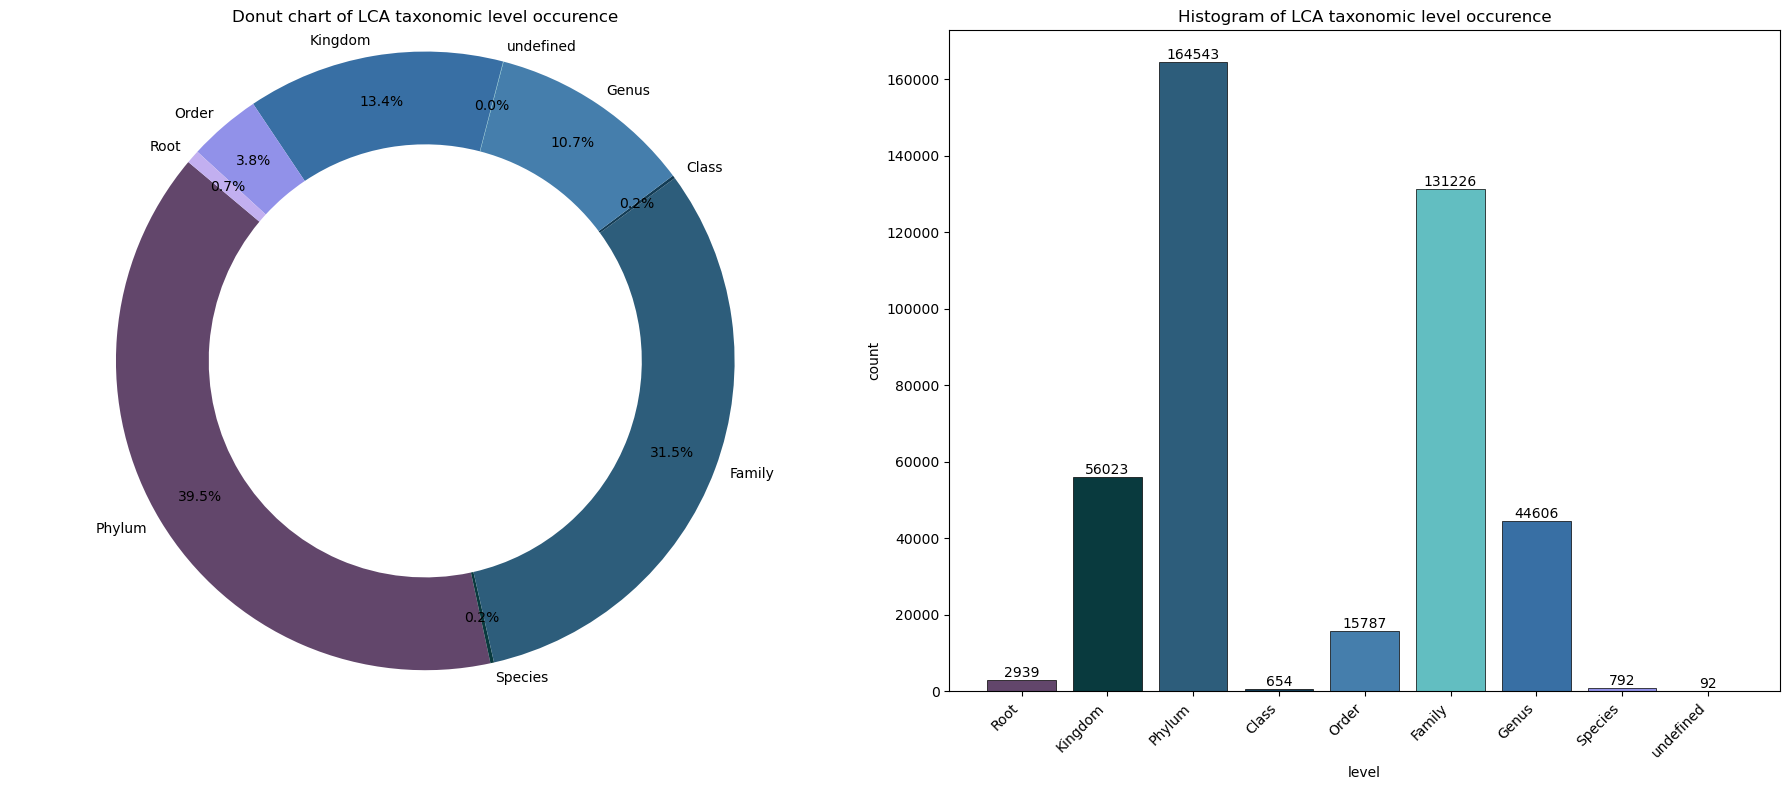

In [37]:
custom_order = ['Phylum', 'Species', 'Family', 'Class', 'Genus', 'undefined', 'Kingdom', 'Order', 'Root']
plot_donut_and_histogram_with_custom_order(df_clades, custom_order=custom_order,donut_explode=0, colors=lca_colors, title_donut="Donut chart of LCA taxonomic level occurence", title_hist="Histogram of LCA taxonomic level occurence")

## Top 10 most frequent LCA distribution

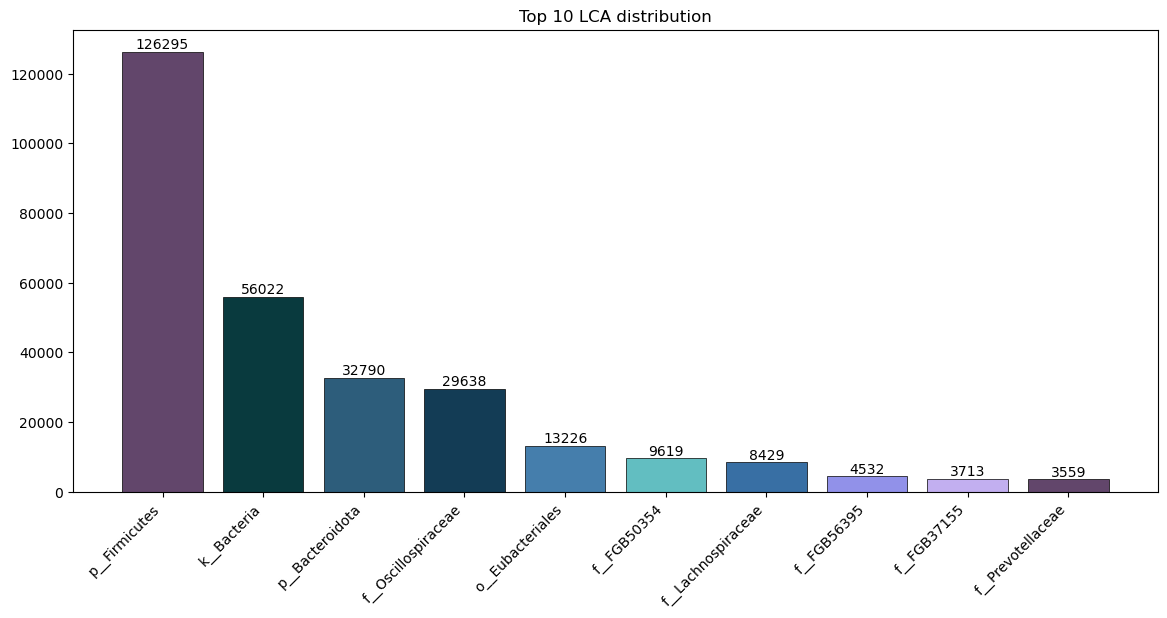

In [38]:
df_LCA_top10=df_LCA.head(10)
plt.figure(figsize=(14, 6))
plt.bar(df_LCA_top10["LCA"],df_LCA_top10["count"], color=lca_colors, edgecolor='black', linewidth=0.5)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 LCA distribution')
for i, v in enumerate(df_LCA_top10["count"]):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom')

## Top 3 LCA at each taxonomic level

In [39]:
df_LCA_kingdom=make_df_top3_LCA(df_LCA,"k",3)
df_LCA_phylum=make_df_top3_LCA(df_LCA,"p",3)
df_LCA_class=make_df_top3_LCA(df_LCA,"c",3)
df_LCA_order=make_df_top3_LCA(df_LCA,"o",3)
df_LCA_family=make_df_top3_LCA(df_LCA,"f",3)
df_LCA_genus=make_df_top3_LCA(df_LCA,"g",3)
df_LCA_species=make_df_top3_LCA(df_LCA,"s",3)

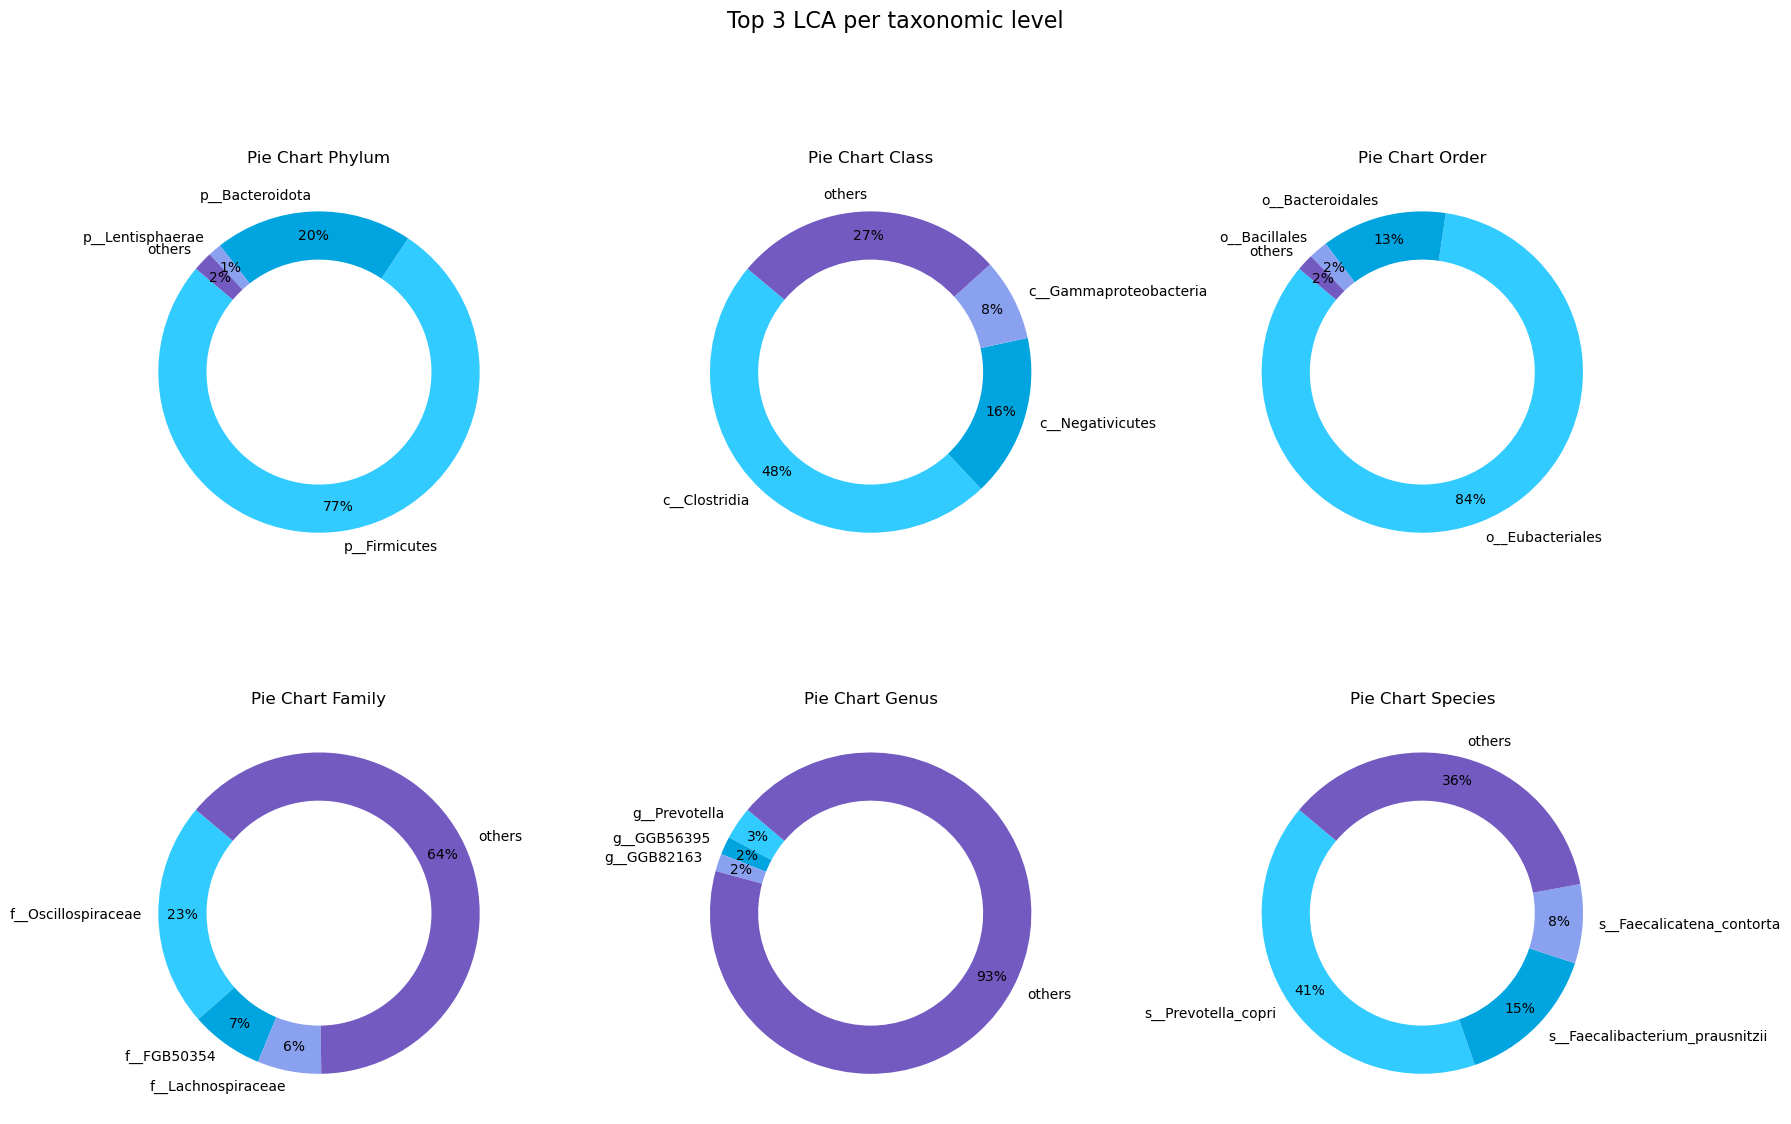

In [40]:
df_LCA_list=[df_LCA_phylum,df_LCA_class,df_LCA_order,df_LCA_family,df_LCA_genus,df_LCA_species]
names_list=["Phylum","Class","Order","Family","Genus","Species"]

make_multiple_pies(df_LCA_list,"count","LCA",family_colors,names_list)

## Top 10 most frequent species

In [44]:
df_top_species=df_top_species_raw.value_counts().rename_axis('tax').reset_index(name='count')
df_top_species.head(30
                    )


,tax,count
0,s__Prevotella_copri,3401
1,s__GGB56395_SGB104703,1839
2,s__GGB85863_SGB117542,1757
3,s__GGB56395_SGB113480,1569
4,s__GGB82821_SGB114879,1566
5,s__Faecalibacterium_prausnitzii,1545
6,s__GGB85218_SGB119228,1137
7,s__GGB13275_SGB117969,1127
8,s__GGB79155_SGB105764,1122
9,s__GGB86317_SGB118236,1088


## Top 10 most frequent genus

In [42]:
df_top_genus=df_top_genus_raw.value_counts().rename_axis('tax').reset_index(name='count')
df_top_genus.head(10)

,tax,count
0,g__Prevotella,10415
1,g__GGB56395,6895
2,g__GGB82163,5930
3,g__Bacteroides,5562
4,g__Clostridium,4900
5,g__GGB79155,3229
6,g__GGB45557,3041
7,g__GGB52271,2837
8,g__GGB13275,2831
9,g__Oscillibacter,2777


# Gene analysis

In [43]:
df_gene_raw=pd.DataFrame()
gene_list=[]
e=0
z=0
samples=df["sampleID"].to_list()
for sample in samples:
    with open(f"/home/giacomo/Thesis-Internship/waafle/data/{sample}.lgt.tsv", "r") as infile:
        next(infile)
        A=[]
        B=[]
        A=0
        B=0
        for line in infile:
            
            line=line.rstrip()
            order=line.split("\t")[5]
            genes=line.split("\t")[16].split("|")
            direction=line.split("\t")[6]
            
            for letter in order:
                if letter=="A":
                    A+=1
                elif letter=="B":
                    B+=1
                else:
                    continue
                
            if direction == "A>B":
                for n in range(len(order)):
                    if order[n]=="A" and genes[n]!="None":
                        gene_list.append(genes[n])
                    else:
                        continue 
            elif direction == "B>A":
                for n in range(len(order)):
                    if order[n]=="B"and genes[n]!="None":
                        gene_list.append(genes[n])
                    else:
                        continue
            else:
                if A>B:
                    for n in range(len(order)):
                        if order[n]=="B"and genes[n]!="None": 
                            gene_list.append(genes[n])
                        else:
                            continue
                elif B>A:
                    for n in range(len(order)):
                        if order[n]=="A"and genes[n]!="None":
                            gene_list.append(genes[n])
                        else:
                            continue  
                else:
                    continue         

df_gene_raw["gene"]=gene_list
# #df.to_csv(f"/home/giacomo/Thesis-Internship/waafle/{dir}/{file}", sep="\t", index=False)
df_gene=df_gene_raw.value_counts().rename_axis('gene').reset_index(name='count')
df_gene.head(20)

,gene,count
0,A0A0D5ZC06,365
1,A0A366U8W6,222
2,A0A175AB67,128
3,A0A2T3FJH8,101
4,A0A1D7TLJ4,95
5,F9GM88,80
6,R5QEH0,77
7,A0A3D5WK30,71
8,A0A252F288,71
9,A0A070FJW8,71
